In [405]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [406]:
file = r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv"

df = pd.read_csv(file)

In [407]:
print("No of Rows: ", df.shape[0])
print("No of Columns: ",df.shape[1])
df.head()

No of Rows:  32560
No of Columns:  15


Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [408]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

**Comment:**

**Most of the columns are self-explanatory remaining are explain below:**
- Fnlwgt : sampling weight.
- Education_num : number of years of education in total.
- Capital_gain/Capital_loss : income from investment sources other than salary/wages.

# Statistical Analysis

**Before going for Statistical exploration of data, first check integrity of data & Missing value.**

# Data Integrity

**Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.**

In [409]:
df.duplicated().sum()

24

**If we just check CSV File we can find that there are some missing value in dataset which shown fill with '?'**

let check how many question mark inside the dataset.

In [410]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

**Let replace ' ?' with np.NaN**

In [411]:
df = df.replace(' ?',np.NaN)

**Let check if any whitespaces, 'NA', or '-' exist in dataset.**

In [412]:
df.isin([' ','NA','-']).sum().any()

False

- We have replace '?' with np.NaN
- No whitespace, NA, '-' exist in dataset.

**Let drop duplicated entry from dataset before checking null values.**

In [413]:
df.drop_duplicates(keep='last',inplace=True)

In [414]:
df.shape

(32536, 15)

# Missing value check

<Axes: >

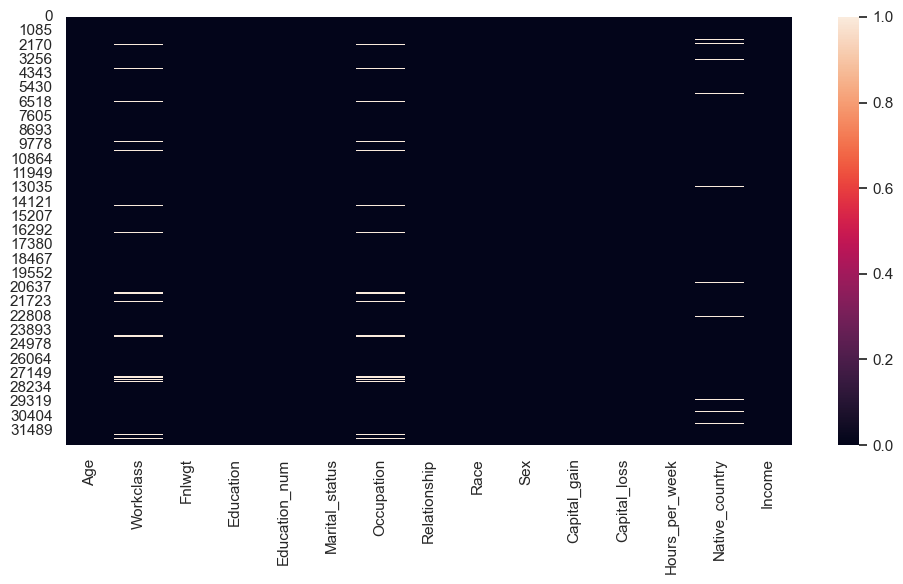

In [415]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

- There are missing values in Occupation, workclass, and Native country

In [416]:
# Finding what percentage of data is missing from the dataset.
missing = df.isnull().sum().sort_values(ascending=False)
percentage = (missing/len(df))*100
print(pd.concat([missing, percentage],axis=1, keys=['Missing Values', '% missing data']))

                Missing Values  % missing data
Occupation                1843        5.664495
Workclass                 1836        5.642980
Native_country             582        1.788788
Age                          0        0.000000
Fnlwgt                       0        0.000000
Education                    0        0.000000
Education_num                0        0.000000
Marital_status               0        0.000000
Relationship                 0        0.000000
Race                         0        0.000000
Sex                          0        0.000000
Capital_gain                 0        0.000000
Capital_loss                 0        0.000000
Hours_per_week               0        0.000000
Income                       0        0.000000


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


**Observation:**
- There are 32536 rows, 14 independent columns and 1 Target feature.
- Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, Hours_per_week are Numerical variable and having int64 datatypes.
- Work class, Education, Marital_status, Occupation, relationship, sex, race, native country are categorical feature with object datatypes.

In [418]:
# Separating Categorical And Numerical variable
Numerical = ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

# Missing value Imputation

**Occupation, Workclass and Native Country are categorical variable so we can imputate them with mode of that feature.**

In [419]:
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

# Missing value check after imputation

In [420]:
# Finding what percentage of data is missing from the dataset.
missing = df.isnull().sum().sort_values(ascending=False)
percentage = (missing/len(df))*100
print(pd.concat([missing, percentage],axis=1, keys=['Missing Values', '% missing data']))

                Missing Values  % missing data
Age                          0             0.0
Workclass                    0             0.0
Fnlwgt                       0             0.0
Education                    0             0.0
Education_num                0             0.0
Marital_status               0             0.0
Occupation                   0             0.0
Relationship                 0             0.0
Race                         0             0.0
Sex                          0             0.0
Capital_gain                 0             0.0
Capital_loss                 0             0.0
Hours_per_week               0             0.0
Native_country               0             0.0
Income                       0             0.0


- Finally, No Missing Value is present

We are Now Yes To Go Further!!!

<Axes: >

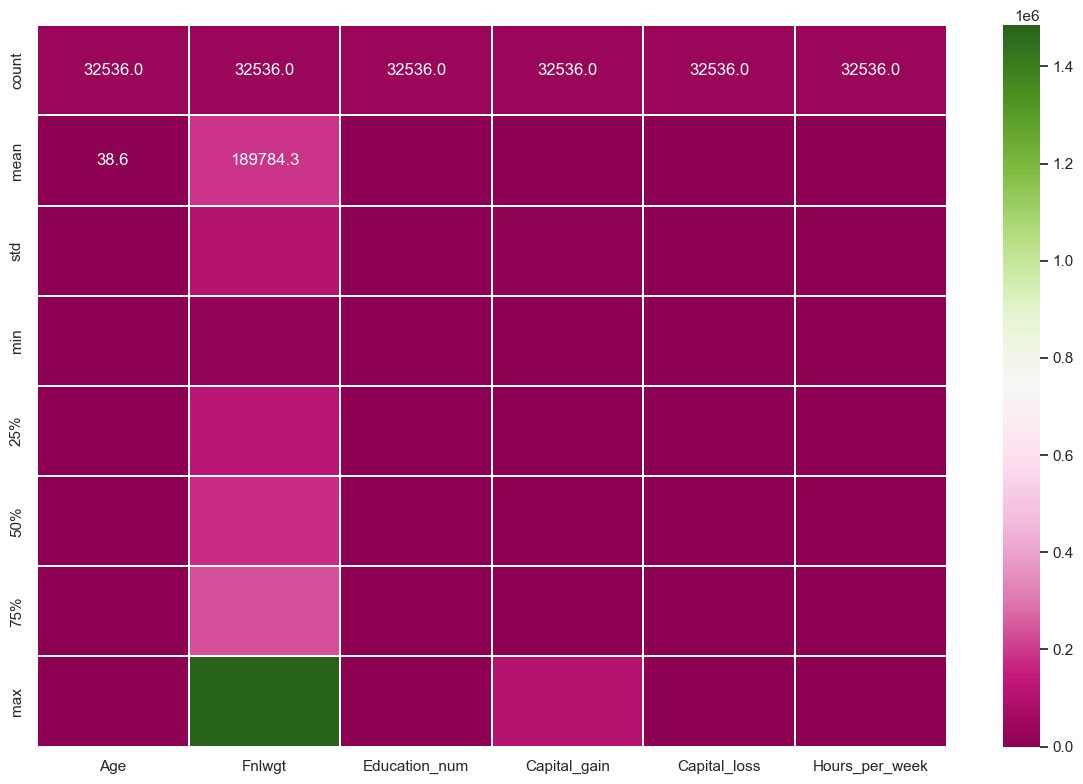

In [421]:
# Visualizing the statistics of the columns using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True,cmap='PiYG')

In [422]:
df.describe().T

count           mean            std      min       25%  \
Age             32536.0      38.585536      13.638193     17.0      28.0   
Fnlwgt          32536.0  189784.298992  105556.258211  12285.0  117831.5   
Education_num   32536.0      10.081725       2.571622      1.0       9.0   
Capital_gain    32536.0    1078.410069    7388.068465      0.0       0.0   
Capital_loss    32536.0      87.370912     403.107737      0.0       0.0   
Hours_per_week  32536.0      40.440343      12.347079      1.0      40.0   

                     50%        75%        max  
Age                 37.0      48.00       90.0  
Fnlwgt          178356.0  236993.25  1484705.0  
Education_num       10.0      12.00       16.0  
Capital_gain         0.0       0.00    99999.0  
Capital_loss         0.0       0.00     4356.0  
Hours_per_week      40.0      45.00       99.0

**Observation:**
- The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the averageage is 37
- The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
- While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
- The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

**Start Exploring categorical features with Enlisting Value counts & Sub-categories**


In [423]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Workclass
Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
Education
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: count, dtype: int64
Marital_status
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64
Occupation
Occupation
 Prof-specialty       

# EDA

**Start EDA by analysing our target variable first.**

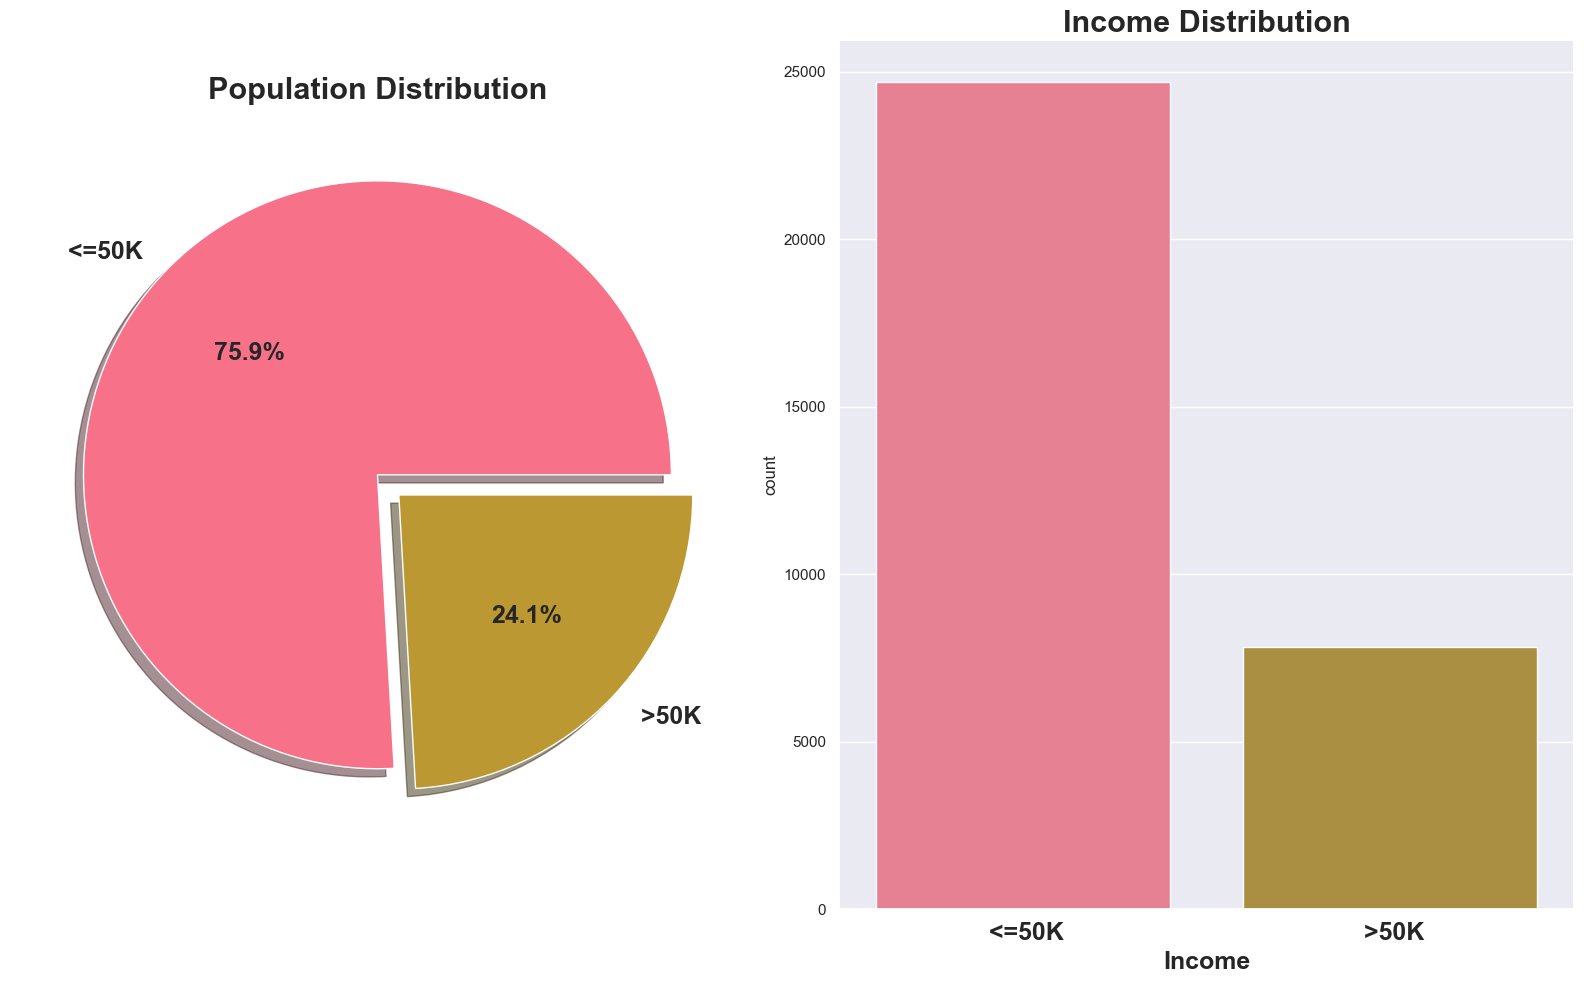

In [424]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette("husl")
f,ax=plt.subplots(1,2,figsize=(16,10))
df['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%', textprops={'fontweight':'bold','fontsize':18}, ax=ax[0], shadow=True)
ax[0].set_title('Population Distribution', fontsize=22, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Income', data=df, ax=ax[1])
ax[1].set_title('Income Distribution', fontsize=22,fontweight='bold')
ax[1].set_xlabel('Income',fontsize=18, fontweight='bold')
plt.xticks(fontsize=18,fontweight='bold')
plt.show()

**Observation:**
- 75.9% population (24697 peoples) have income less than 50k.
- Our task is to predict income and we see that target variable income is imbalanced.

**Let check each feature against Target variable to gain more insight into data before finding answer of important questions.**

**Exploration of Age**

In [425]:
print('Minimum Age: ',df['Age'].min(),'years')
print('Maximum Age: ',df['Age'].max(),'years')
print('Average Age: ',df['Age'].mean(),'years')

Minimum Age:  17 years
Maximum Age:  90 years
Average Age:  38.58553602163757 years


In [426]:
# Defining function to create new columns to classify people accoding different age group

def age_group(x):
    x=int(x)
    x=abs(x)
    if(18 < x < 31):
        return "19-30"
    if(30 < x < 41):
        return "31-40"
    if(40 < x < 51):
        return "41-50"
    if(50 < x < 61):
        return "51-60"
    if(60 < x < 71):
        return "61-70"
    else:
        return 'Greater than 70'

In [427]:
# Calling function age_group
df['age_group'] = df['Age'].apply(age_group)

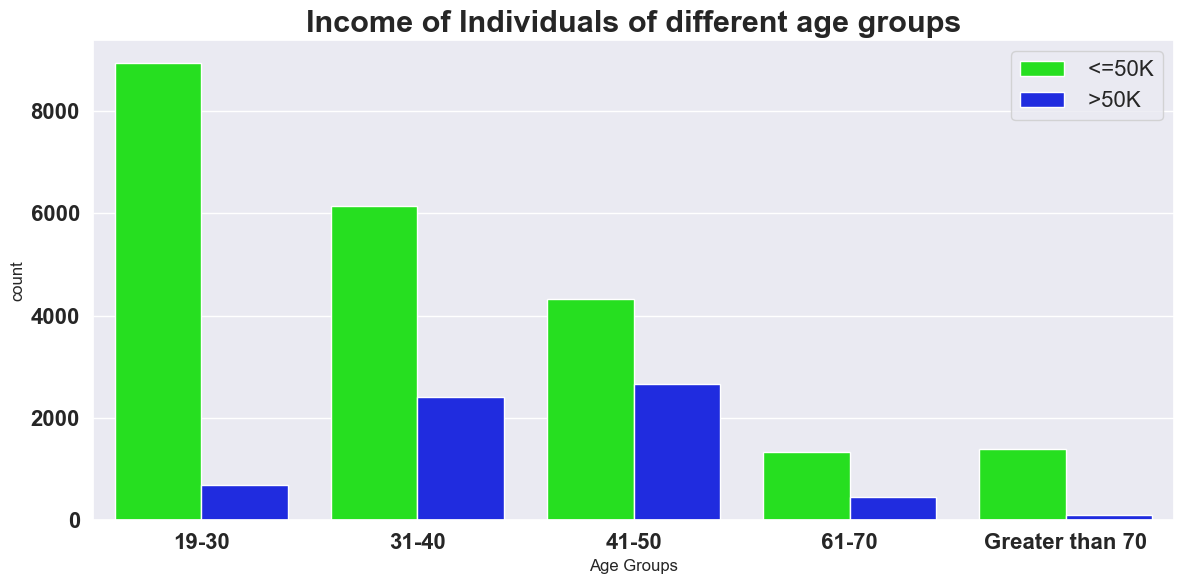

In [428]:
plt.figure(figsize=(12,6))
order_list = ['19-30','31-40','41-50','61-70','Greater than 70']
p = sns.countplot(x=df['age_group'], hue=df['Income'], palette='hsv', order=order_list)
plt.title('Income of Individuals of different age groups', fontsize=22, fontweight='bold')
p.set_xlabel('Age Groups')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.legend(fontsize=16)
plt.show()

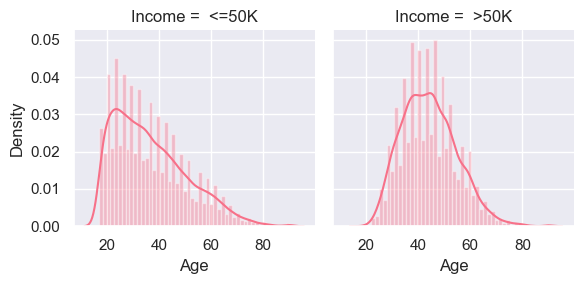

In [429]:
# Distribution of age with income categories
ax = sns.FacetGrid(df, col='Income')
ax.map(sns.distplot,'Age')
plt.show()

**Observation:**

**Here comes an interesting observation. We already know that only 24% people earnings more than 50K dollors and this plot tell us which age group then belong.**
- almost 10% people in age group of 19-30 earns more than 50K dollars and this count drop even more in old peoples having age greater than 70. Might be some lucky old ones has created good Retirement Plan compare to rest old peoples.
- We can find maximum people earning more than 50K dollars to age 41-50 & 51-60. It will be interesting to find out which profession lead this income to this category.

**So let dive into workclass and see what insight we get from there.**

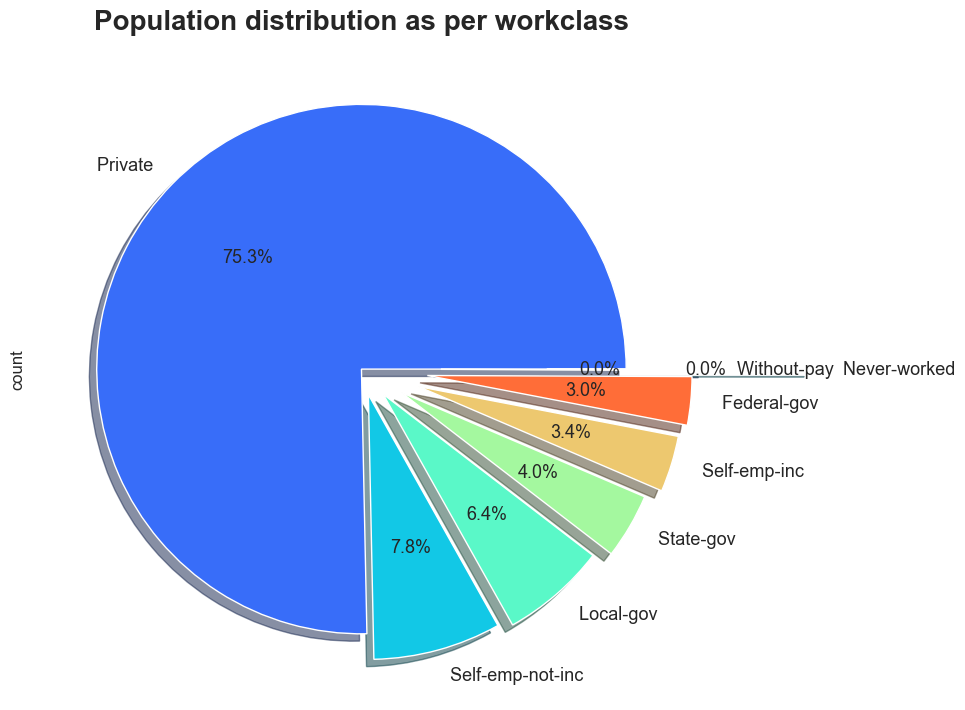

In [430]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Workclass'].value_counts().plot.pie(explode=[0,0.1,0.125,0.175,0.225,0.25,0.3,0.7],autopct='%2.1f%%',textprops={'fontsize':13}, shadow=True)
plt.title('Population distribution as per workclass', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

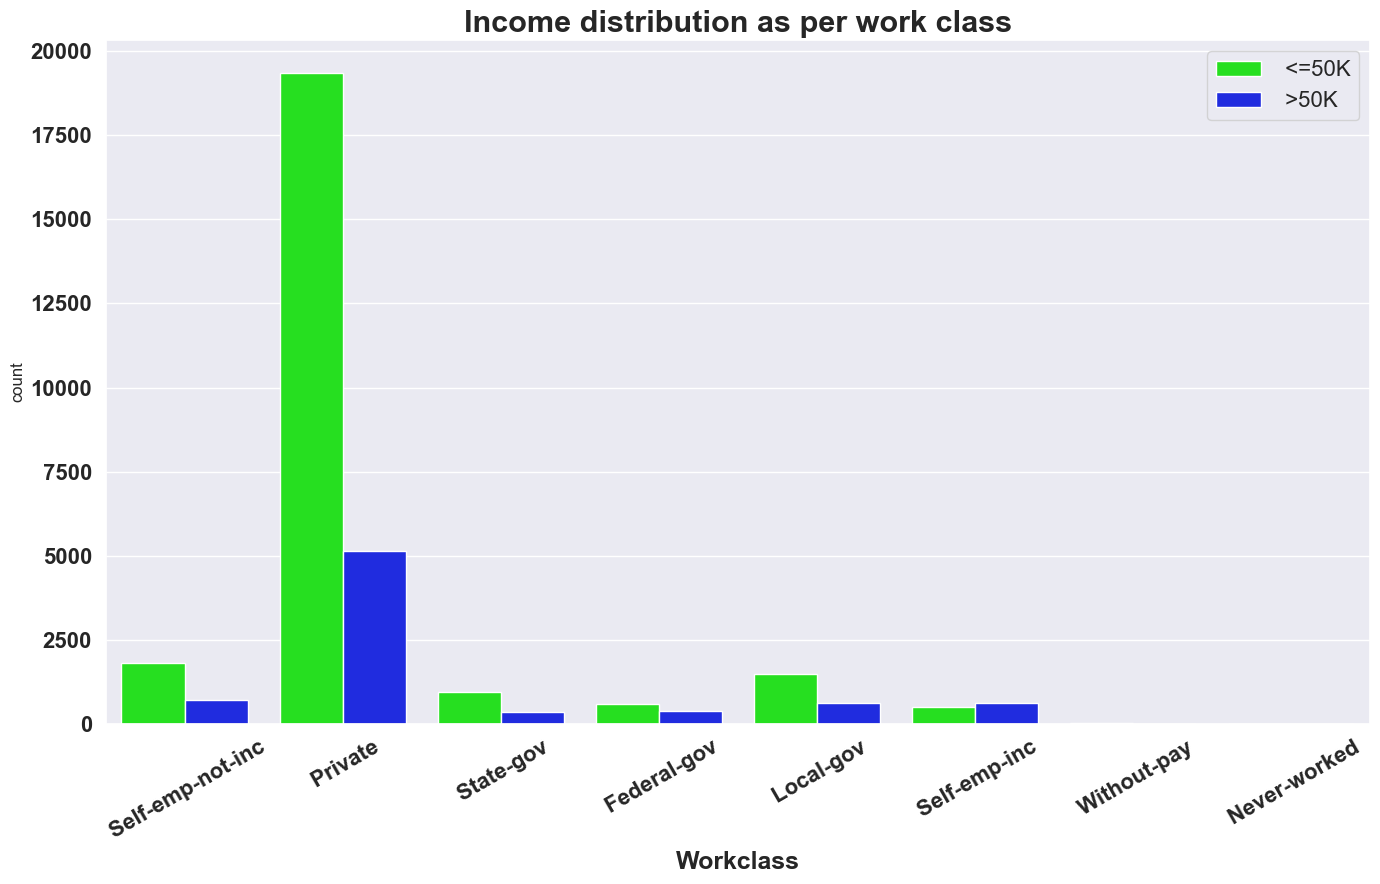

In [431]:
plt.figure(figsize=(14,9))
p=sns.countplot(x=df['Workclass'],hue=df['Income'], palette='hsv')
plt.title('Income distribution as per work class', fontsize=22, fontweight='bold')
p.set_xlabel('Workclass',fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold', rotation=30)
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(fontsize=16)
plt.show()

In [432]:
pd.crosstab(df['Income'],df['Workclass'], margins=True).style.background_gradient(cmap='summer_r')

**Observation:**
- 75.3% people belongs to private sector followed by Self Employed not Incorporated with 7.8%
- Interseting observation comes with Self-Employed Incorporated category where the number of people who earn more than 50K dollars exceed those earning less than it!
- There is significant difference between private sector employees income where less than 25% people eanr more than 50K dollars an year.
- Another quite surprising insight comes from Federal Government countplot where We can see very minute difference between the number of people whose income is more or less than 50K dollars an year. Same goes with state government with some difference.
- Yes, there exist category for who never worked and working without pay but very few people belong to it. These people may be unemployeed or colleges students. But Number is less And thats Good!!!

**Certainly Government Employees have high wages compare to private!!!**


**Education Vs Income**

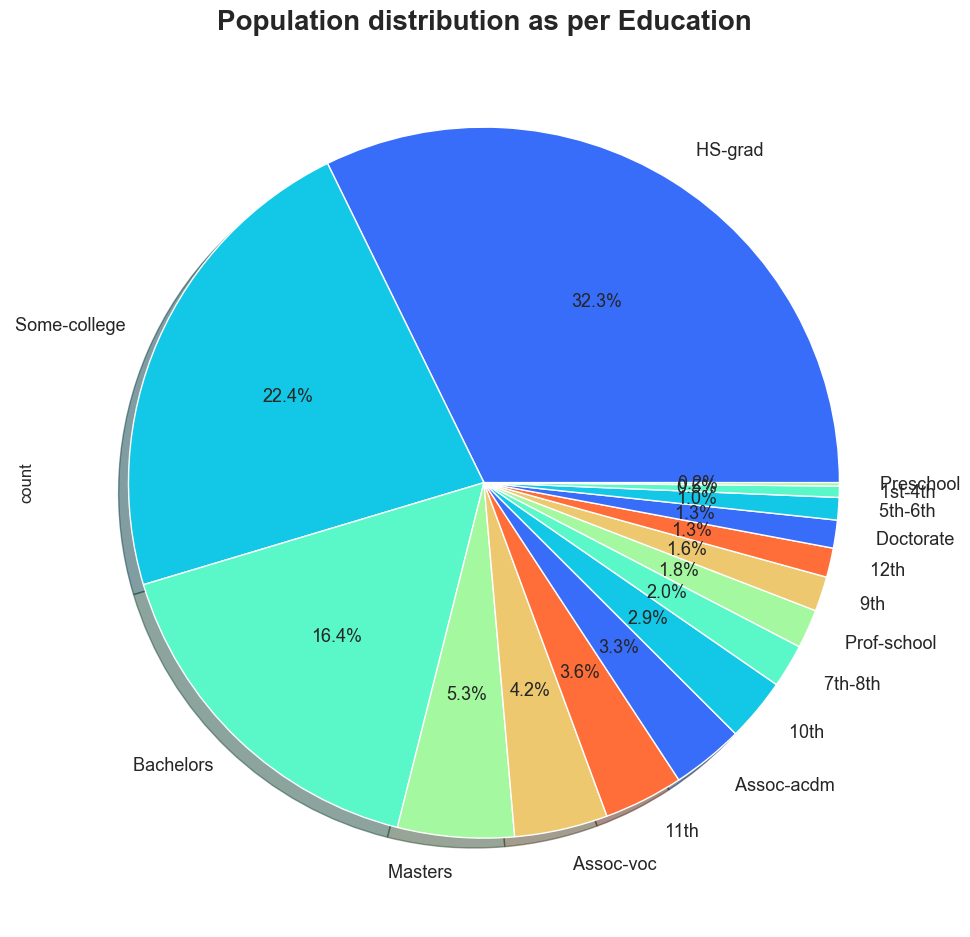

In [433]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Education'].value_counts().plot.pie(autopct='%2.1f%%',textprops={'fontsize':13}, shadow=True)
plt.title('Population distribution as per Education', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

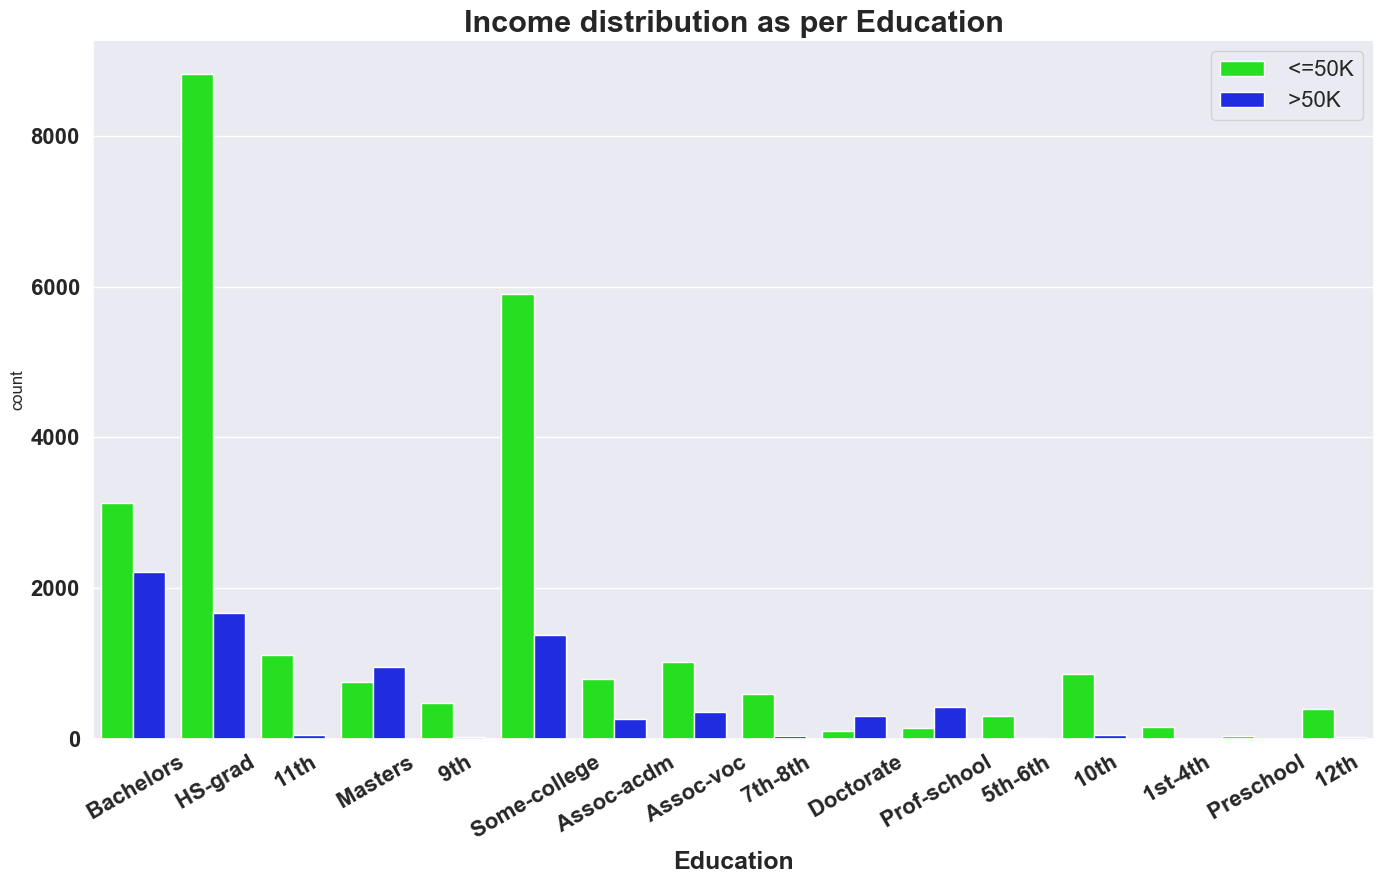

In [434]:
plt.figure(figsize=(14,9))
p=sns.countplot(x=df['Education'],hue=df['Income'], palette='hsv')
plt.title('Income distribution as per Education', fontsize=22, fontweight='bold')
p.set_xlabel('Education',fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold', rotation=30)
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(fontsize=16)
plt.show()

**Observation:**
- Out of all population 32.3% people with HS Grad education which is most prevalent education level.
- 5.3% people with masters and 1.3% population is Doctorate degree holder. Highly educated & intellactual people belongs to this category.
- There are very handful people who earn more than 50K dollars having education below 12th level.
- Maximum number of people who earn more than 50K dollars are Bachelors degree holder.
- Here comes interesting observation about income of highly educated people. in case of people belonging to Masters, Doctorate and Prof-School category in the education level, the number people earning more than 50K dollars an year outnumber than the number of people earning less than it.
- In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars an year!

In [435]:
pd.crosstab(df['Education'],df['Workclass'],margins=True).style.background_gradient(cmap='summer_r')

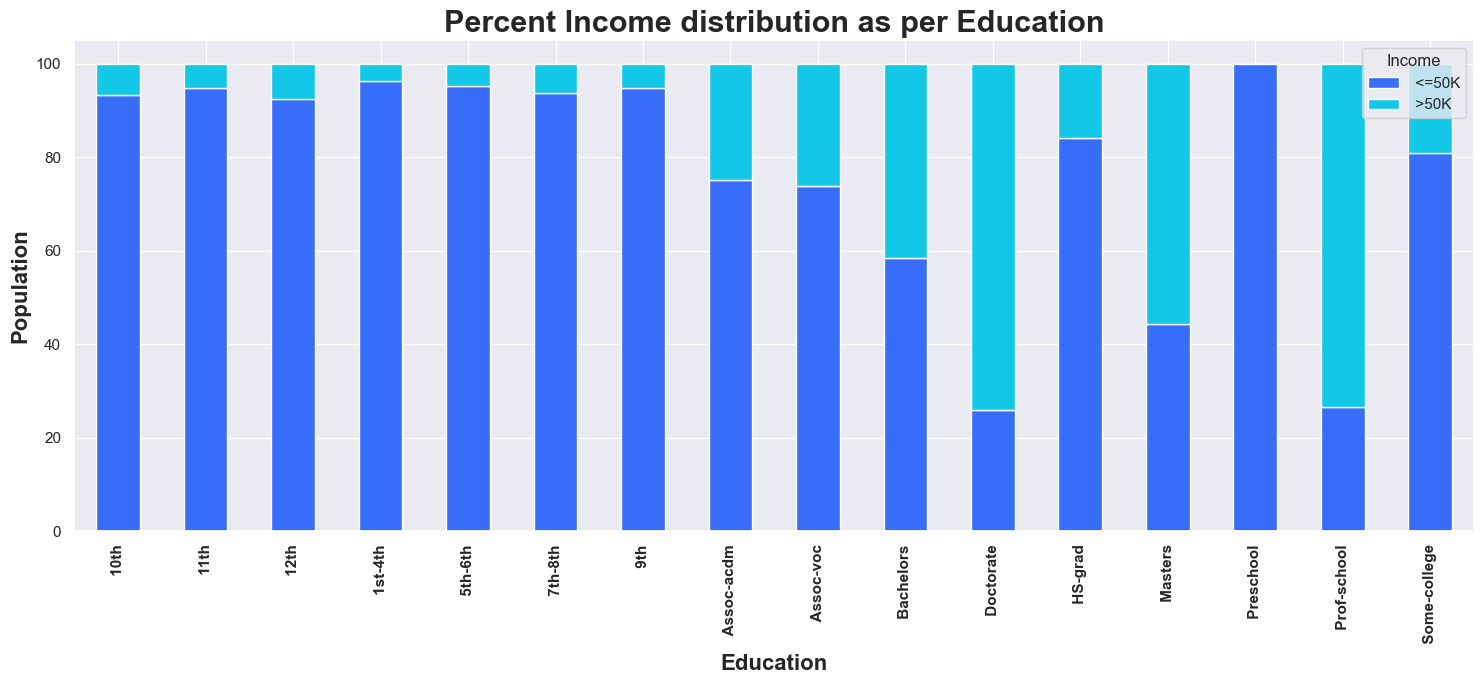

In [436]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table=pd.crosstab(df['Education'],df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Education', fontsize=22, fontweight='bold')
plt.xlabel('Education',fontsize=16,fontweight='bold')
plt.ylabel('Population', fontsize=16, fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

**Observation:**
- In terms of percentage 75% of Doctorate people earn more than 50K dollars an years, followed by Prof-school.
- So, Highly earning people most of times comes with Masters or Doctorate education background.
- From crosstab, we can see that private sector is highest recruiter for HS-Grad with 8305 people.
- Private sector is also major recruiter of highly educated people with masters, doctorate followed by local government.

**Impact of Marital Status on Income**

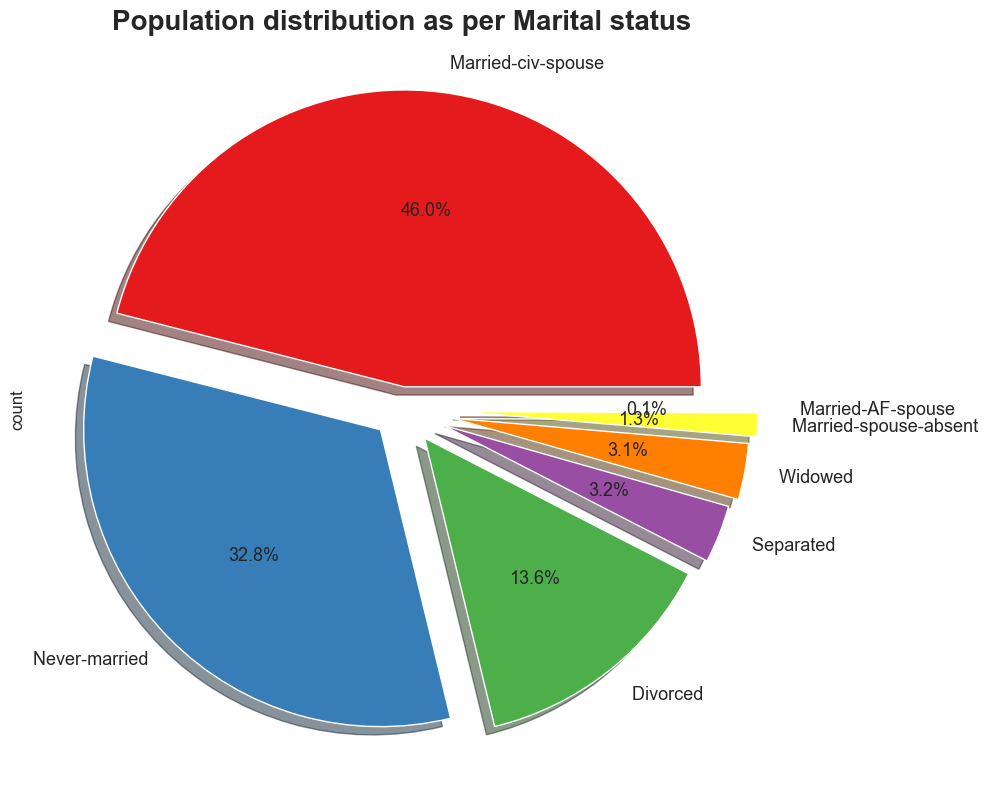

In [437]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('Set1')
plt.figure(figsize=(10,10))
df['Marital_status'].value_counts().plot.pie(explode=[0.075,0.1,0.125,0.15,0.175,0.2,0.225],autopct='%2.1f%%',textprops={'fontsize':13}, shadow=True)
plt.title('Population distribution as per Marital status', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

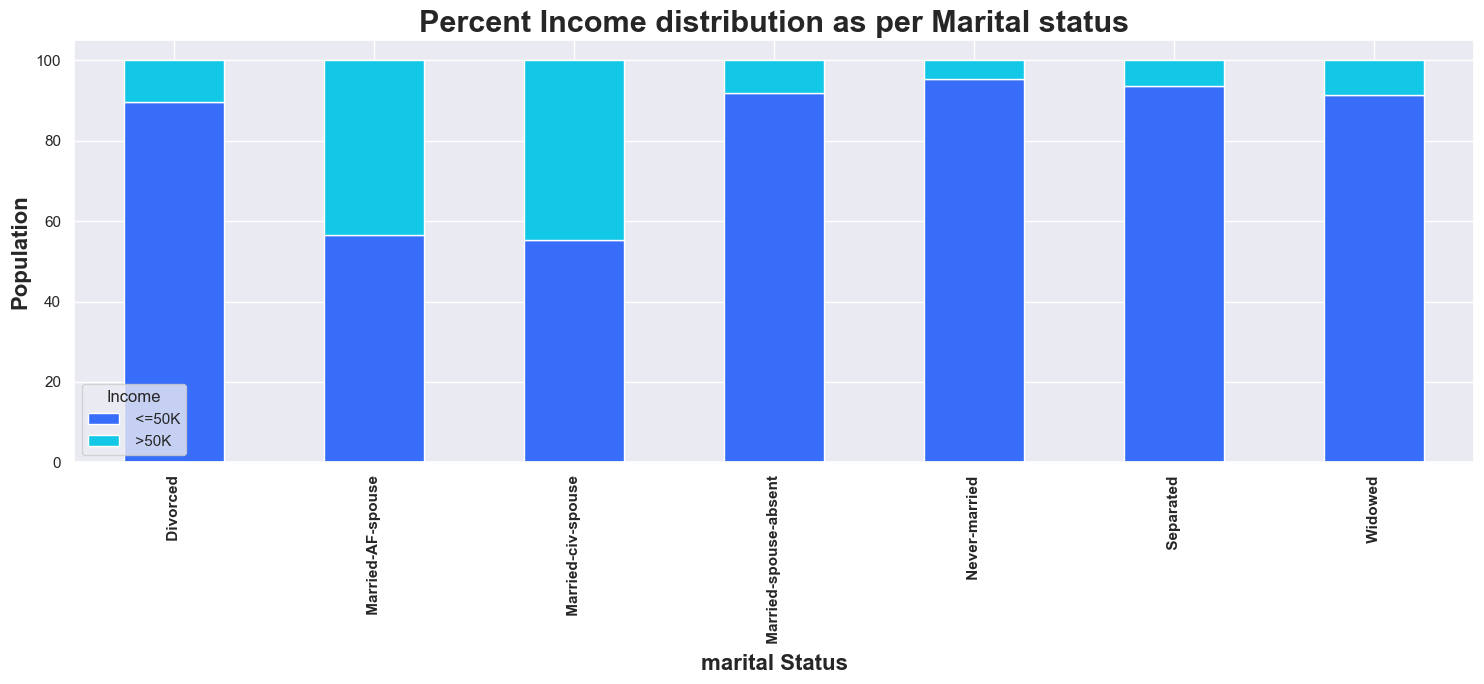

In [438]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table=pd.crosstab(df['Marital_status'],df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Marital status', fontsize=22, fontweight='bold')
plt.xlabel('marital Status',fontsize=16,fontweight='bold')
plt.ylabel('Population', fontsize=16, fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [439]:
pd.crosstab(df['Marital_status'],df['Income'], margins=True).style.background_gradient(cmap='summer_r')

**Observation:**

**Married people are most like to earn more than 50K dollars an year.**
Reason Might be Emotional support and stability of life than who are divorced/separated.
- One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.
- For others, there are less than 25% of the adults earning more than 50K dollars an year.

**Occupation Vs Income**

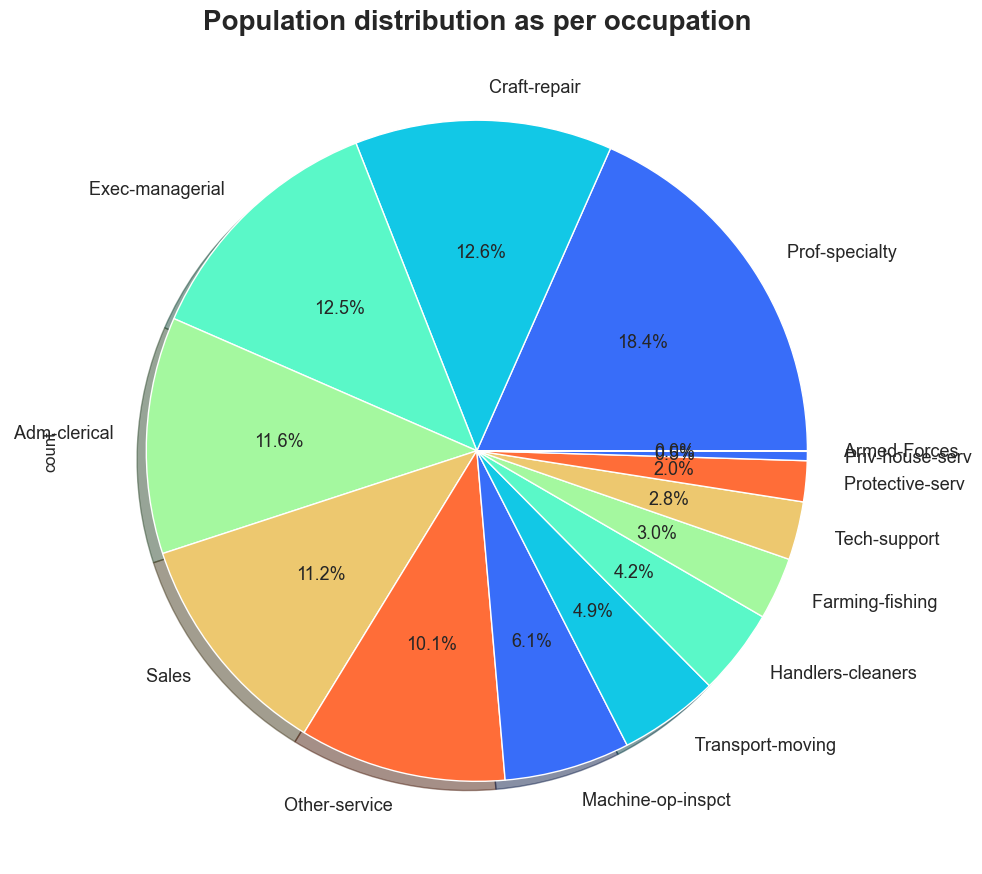

In [440]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Occupation'].value_counts().plot.pie(autopct='%2.1f%%',textprops={'fontsize':13}, shadow=True)
plt.title('Population distribution as per occupation', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

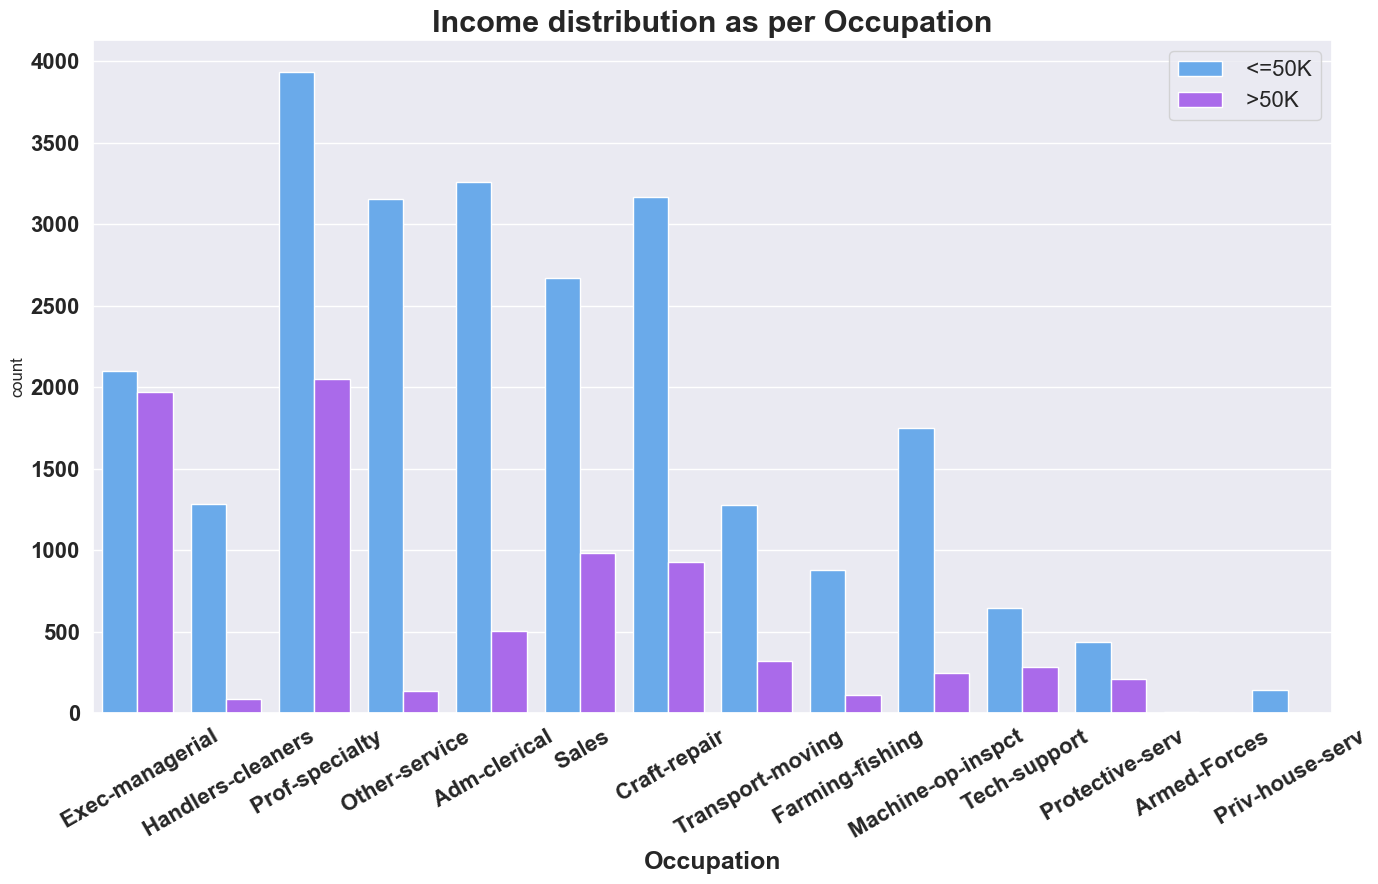

In [441]:
plt.figure(figsize=(14,9))
p=sns.countplot(x=df['Occupation'],hue=df['Income'], palette='cool')
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Occupation',fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold', rotation=30)
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(fontsize=16)
plt.show()

**Observation:**
- Exec-managerial role are equally likely to earn more than 50k dollars an year.
- Peoples working in Arm-Forces, Farming-fishing, Machine-op-inspect, other-service, Adm-clerical, Handlers-cleaners, are very less likely to earn more than 50K dollars an year.
- Around 25% of the people working in Sales earn more than 50K dollars an year.

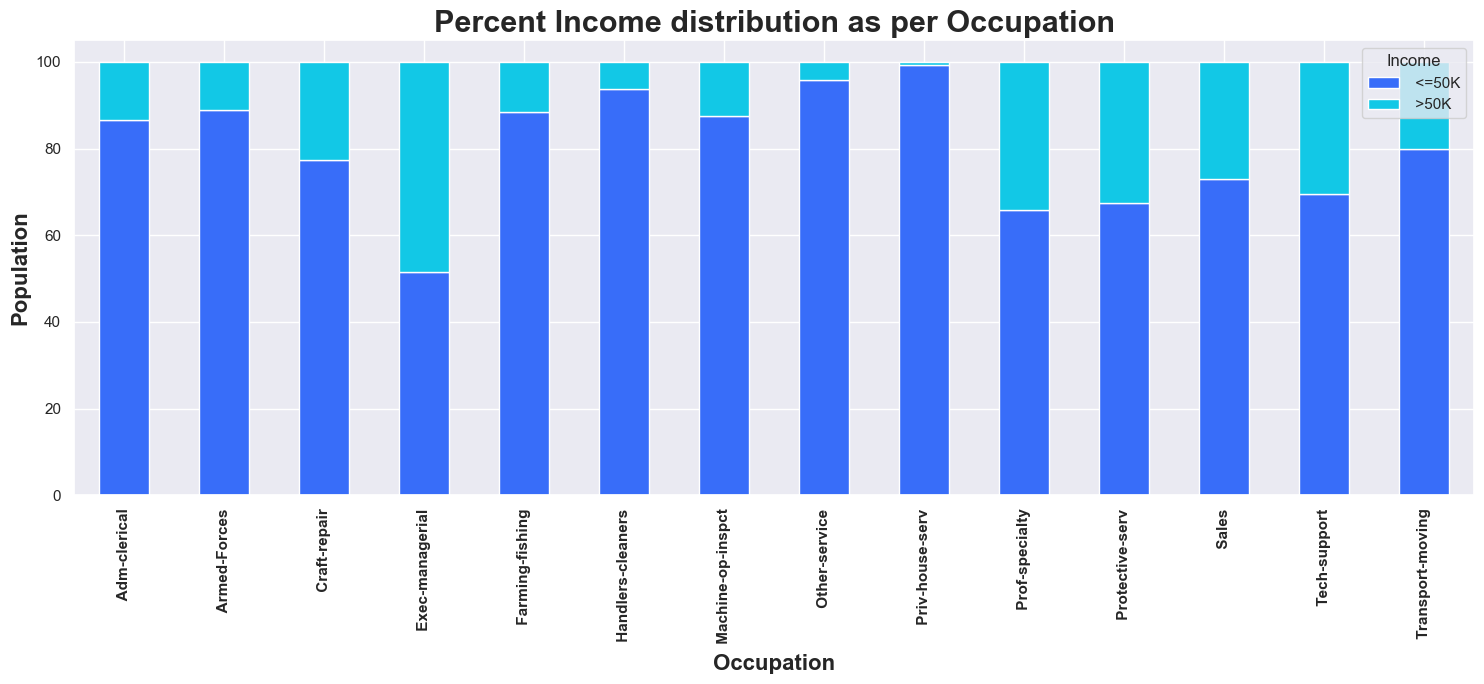

In [442]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table=pd.crosstab(df['Occupation'],df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Occupation', fontsize=22, fontweight='bold')
plt.xlabel('Occupation',fontsize=16,fontweight='bold')
plt.ylabel('Population', fontsize=16, fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [443]:
pd.crosstab(df['Occupation'],df['Income'], margins=True).style.background_gradient(cmap='winter_r')

**Observation:**
- Prof-Speciality position with maximum 2049 peoples followed by Exec-managerial position with 1968 people leads chart for greater than 50K dollars an year.
- If we talk in term of percentage probablity Exective Managerial position have 50% chances to lead in Greater than 50K dollars Club.
- There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year. - Minimum chances for Greater than 50K Club comes from Private House Service occupation where 1/147 chance of getting more than 50K dollars an year.

**Let check where these different occupation fit with respect to Work class through crosstab.**

In [444]:
pd.crosstab(df['Occupation'],df['Workclass'], margins=True).style.background_gradient(cmap='winter_r')

- Here is another surprising element, there are 7 poeples from Never-worked category with High earning profession of Prof-speciality. Same from Without pay workclass we find 6 peoples with Exec-Managerial. Possibly they are working with unpaid internship profile.

**Relationship Vs Income**

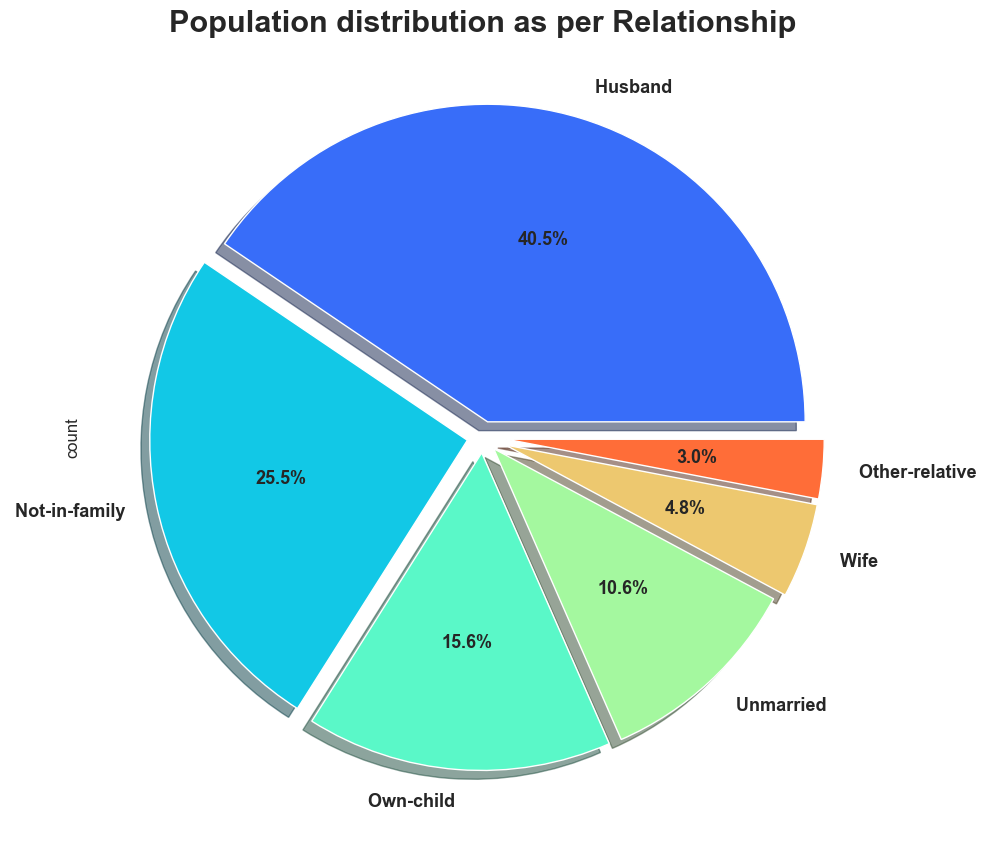

In [445]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Relationship'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075,0.075],
                                           textprops ={'fontweight' :'bold', 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Relationship', fontsize=22,fontweight ='bold')
plt.tight_layout()
plt.show()

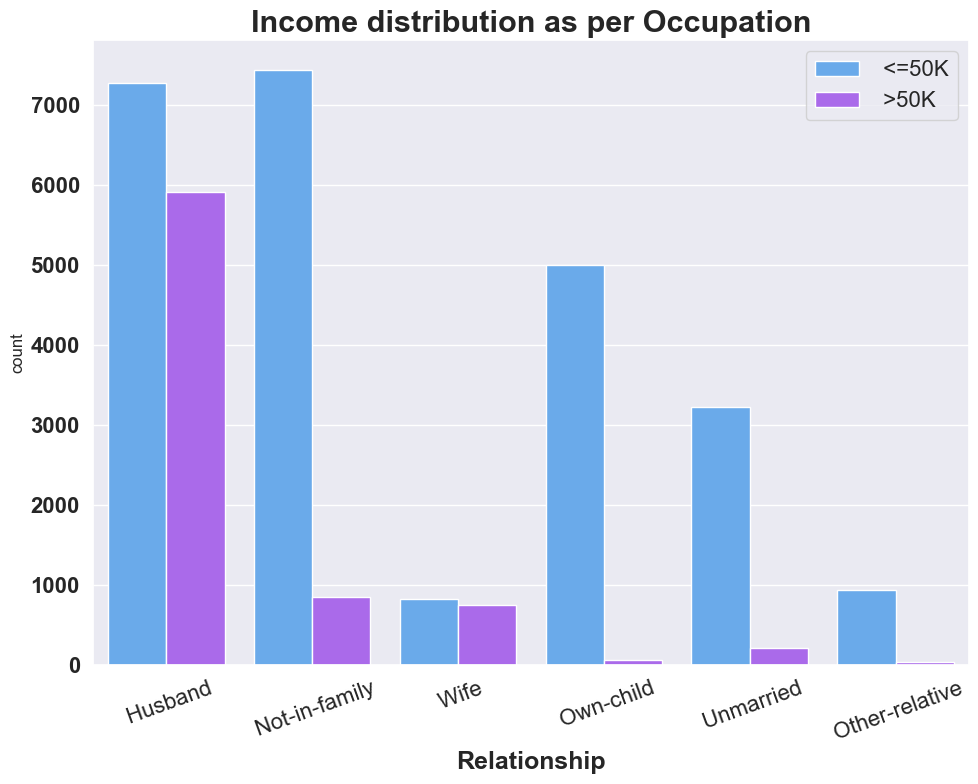

In [446]:
plt.figure(figsize=(10,8))
p = sns.countplot(x=df['Relationship'], hue=df['Income'], palette='cool')
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Relationship',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

- Wives are equally likely to earn more than 50K dollars an year.
- For Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year.
- There are just a handful of Unmarried people earning more than 50K dollars an year.

**Race Vs Income**

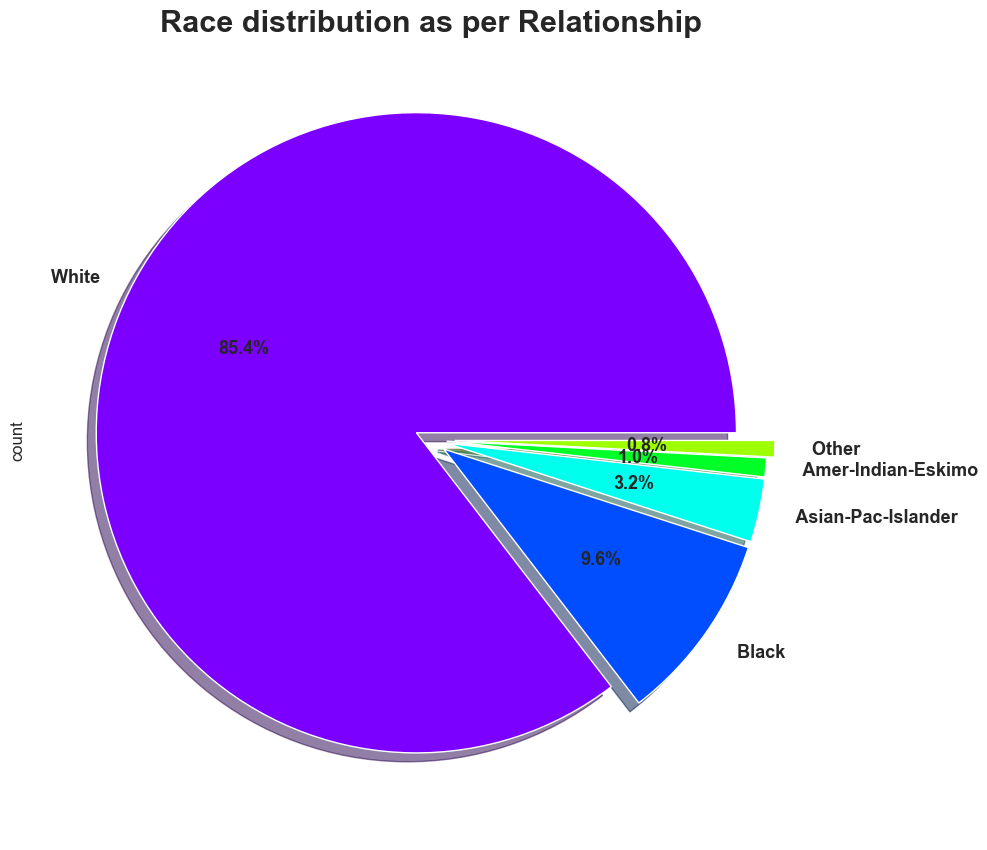

In [447]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(10,10))
df['Race'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075],
                                           textprops ={'fontweight' :'bold', 'fontsize':13}, shadow=True)
plt.title('Race distribution as per Relationship', fontsize=22,fontweight ='bold')
plt.tight_layout()
plt.show()

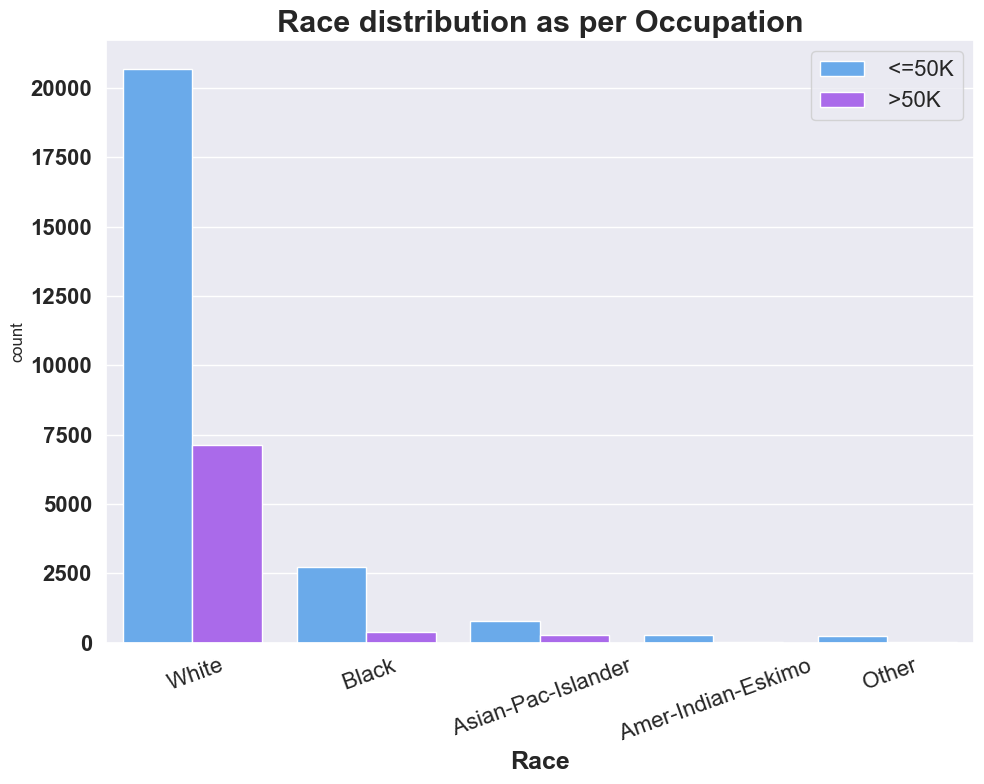

In [448]:
plt.figure(figsize=(10,8))
p = sns.countplot(x=df['Race'], hue=df['Income'], palette='cool')
plt.title('Race distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Race',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

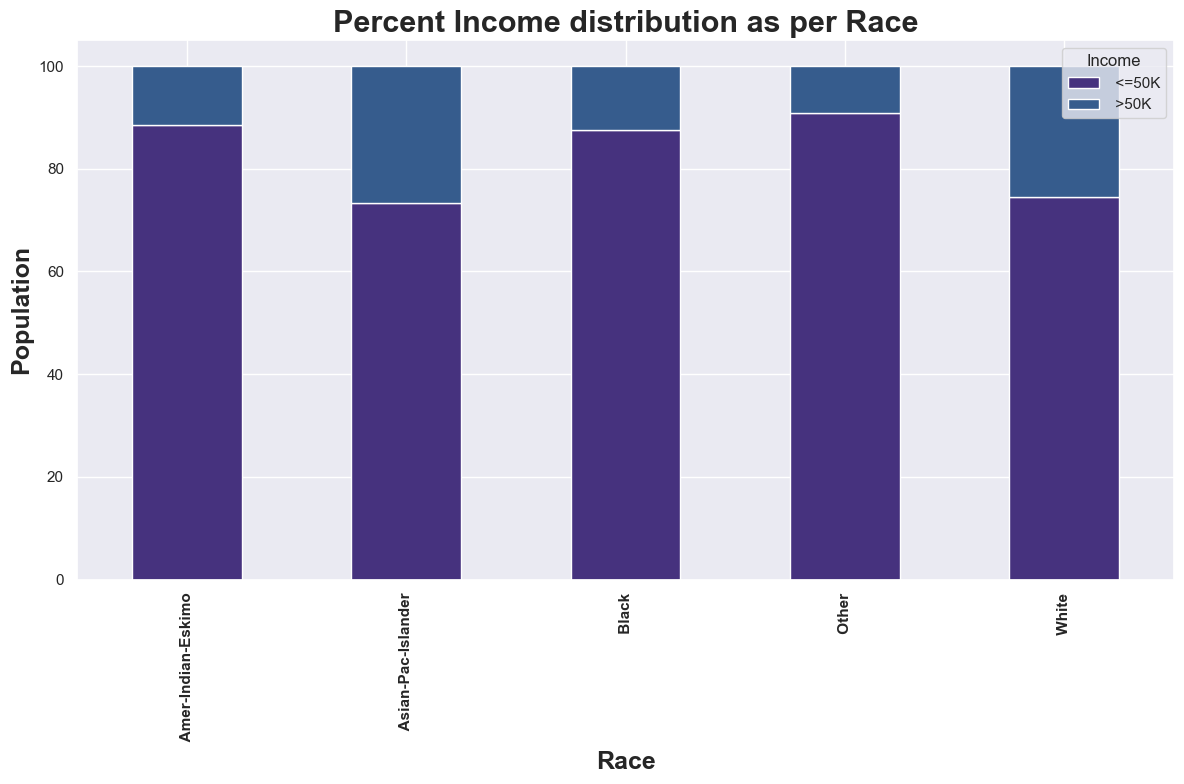

In [449]:
# Percentage Income distribution in terms of Education
sns.set_palette('viridis')
table = pd.crosstab(df['Race'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Race', fontsize=22, fontweight='bold')
plt.xlabel('Race', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

- 85.4% peoples are whites followed by black community with 9.6%
- maximum peoples in Greater than 50K Club are white.
- This observation is biased as we have very less data of other races. So Nothing Meaningful & reliable insight we can draw from it.

**Sex Vs Income**

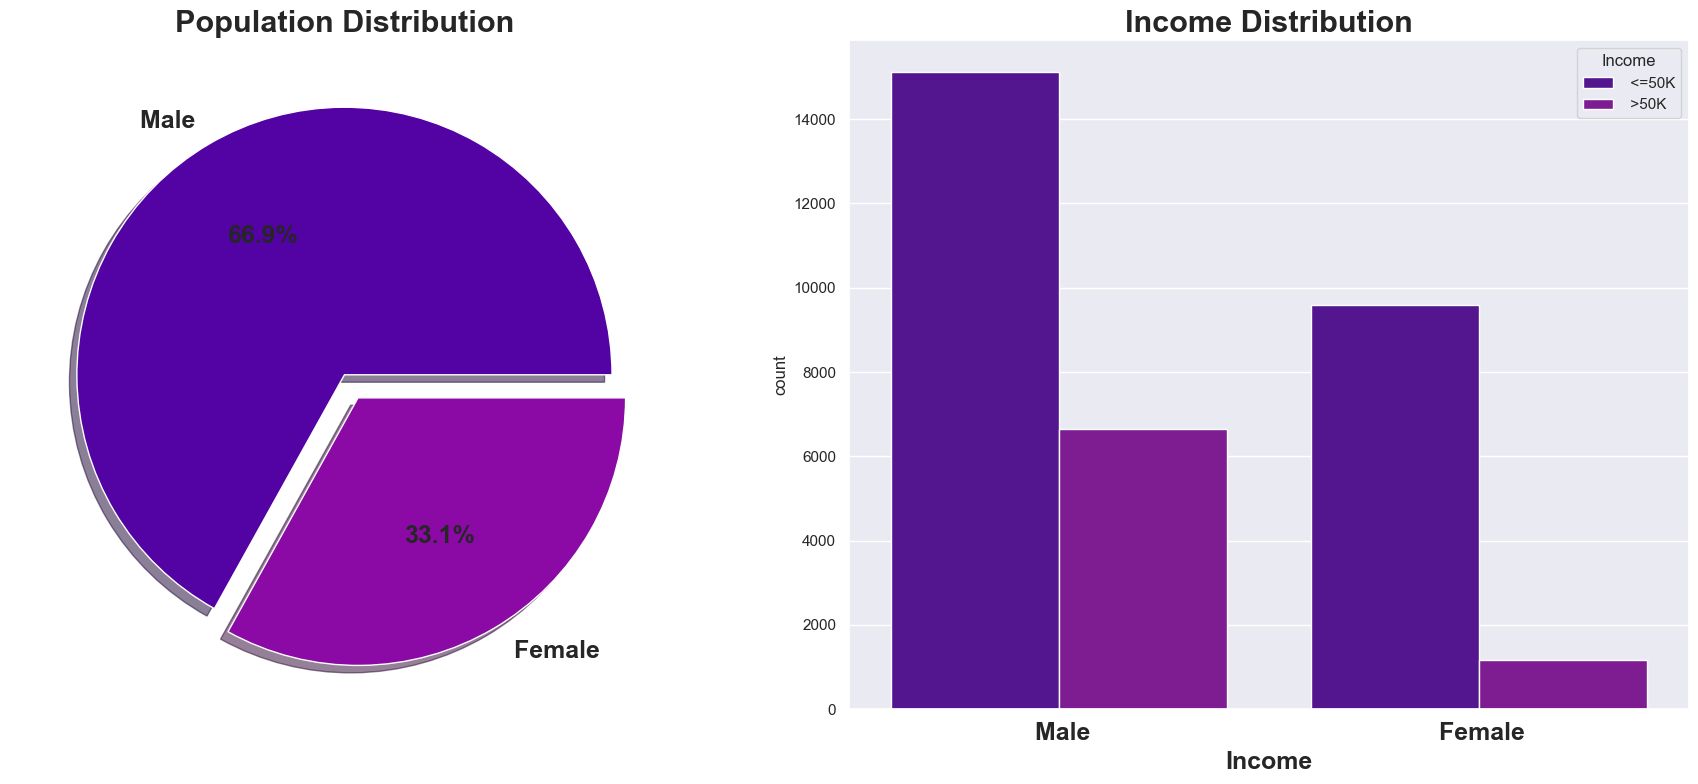

In [450]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Sex',hue=df['Income'] ,data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

- Significant gap between male and female earnings.
- Less than 10% women in Greater than 50K dollar club.
- Around 33% of Men earning more than 50K dollars an year.

**Lets find in which profession these women involved in.**

In [451]:
pd.crosstab(df['Occupation'],[df.Sex,df.Income], margins=True).style.background_gradient(cmap='winter_r')

- Out of all population 33 % are womens. Inside that most of females work in Adm-clerical,Other-service,Prof-specialty.
- Same as in case of Men Maximum number in Greater than 50K dollars Club in females comes from Prof-speciality,Exec-Managerial profession.
- Maximum men work in Prof-Specialty.

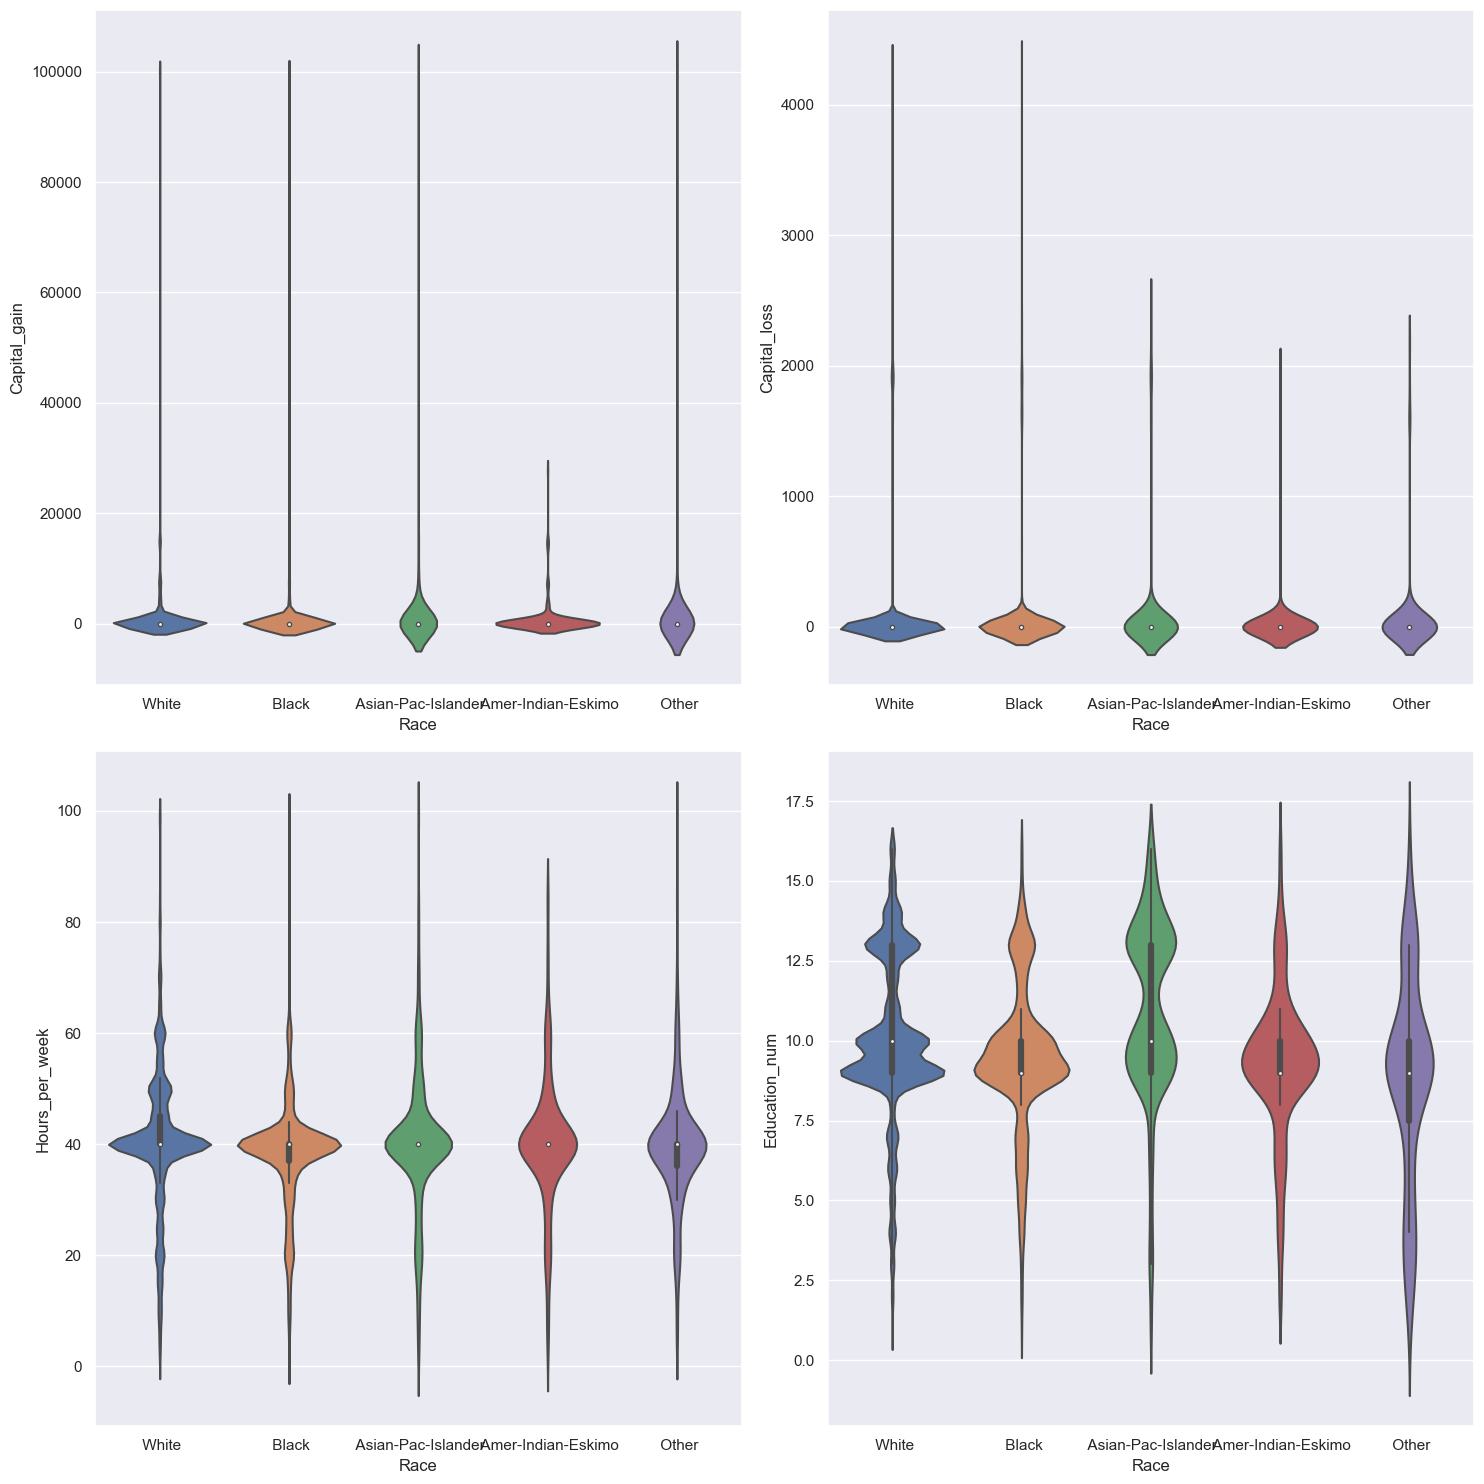

In [452]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [15,15]
sns.set(style = 'darkgrid')

# This Violin plot show how capital gain, loss, hours per week and education vary with the race of the people
plt.subplot(2,2,1)
sns.violinplot(x = df['Race'], y = df['Capital_gain'], data = df);
plt.subplot(2,2,2)
sns.violinplot(x = df['Race'], y = df['Capital_loss'], data = df);
plt.subplot(2,2,3)
sns.violinplot(x = df['Race'], y = df['Hours_per_week'], data = df);
plt.subplot(2,2,4)
sns.violinplot(x = df['Race'], y = df['Education_num'], data = df);

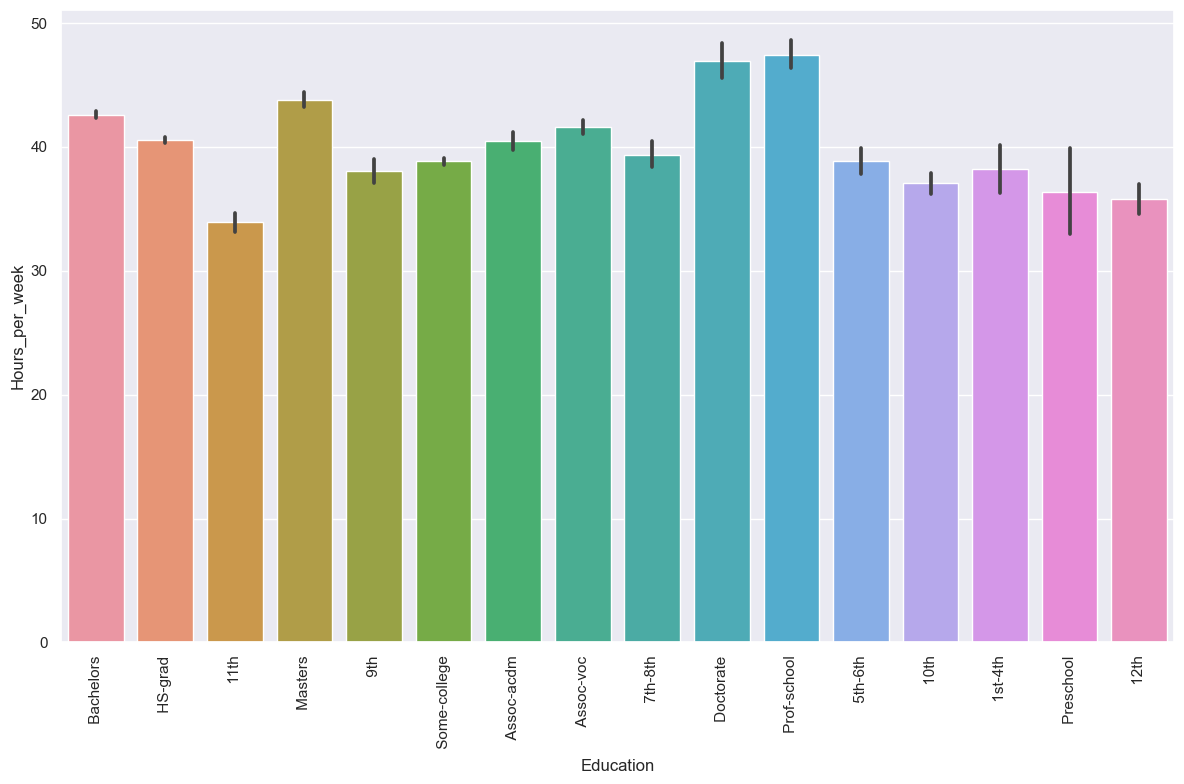

In [453]:
# This shows the hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = df['Education'], y = df['Hours_per_week'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=90)
plt.show()

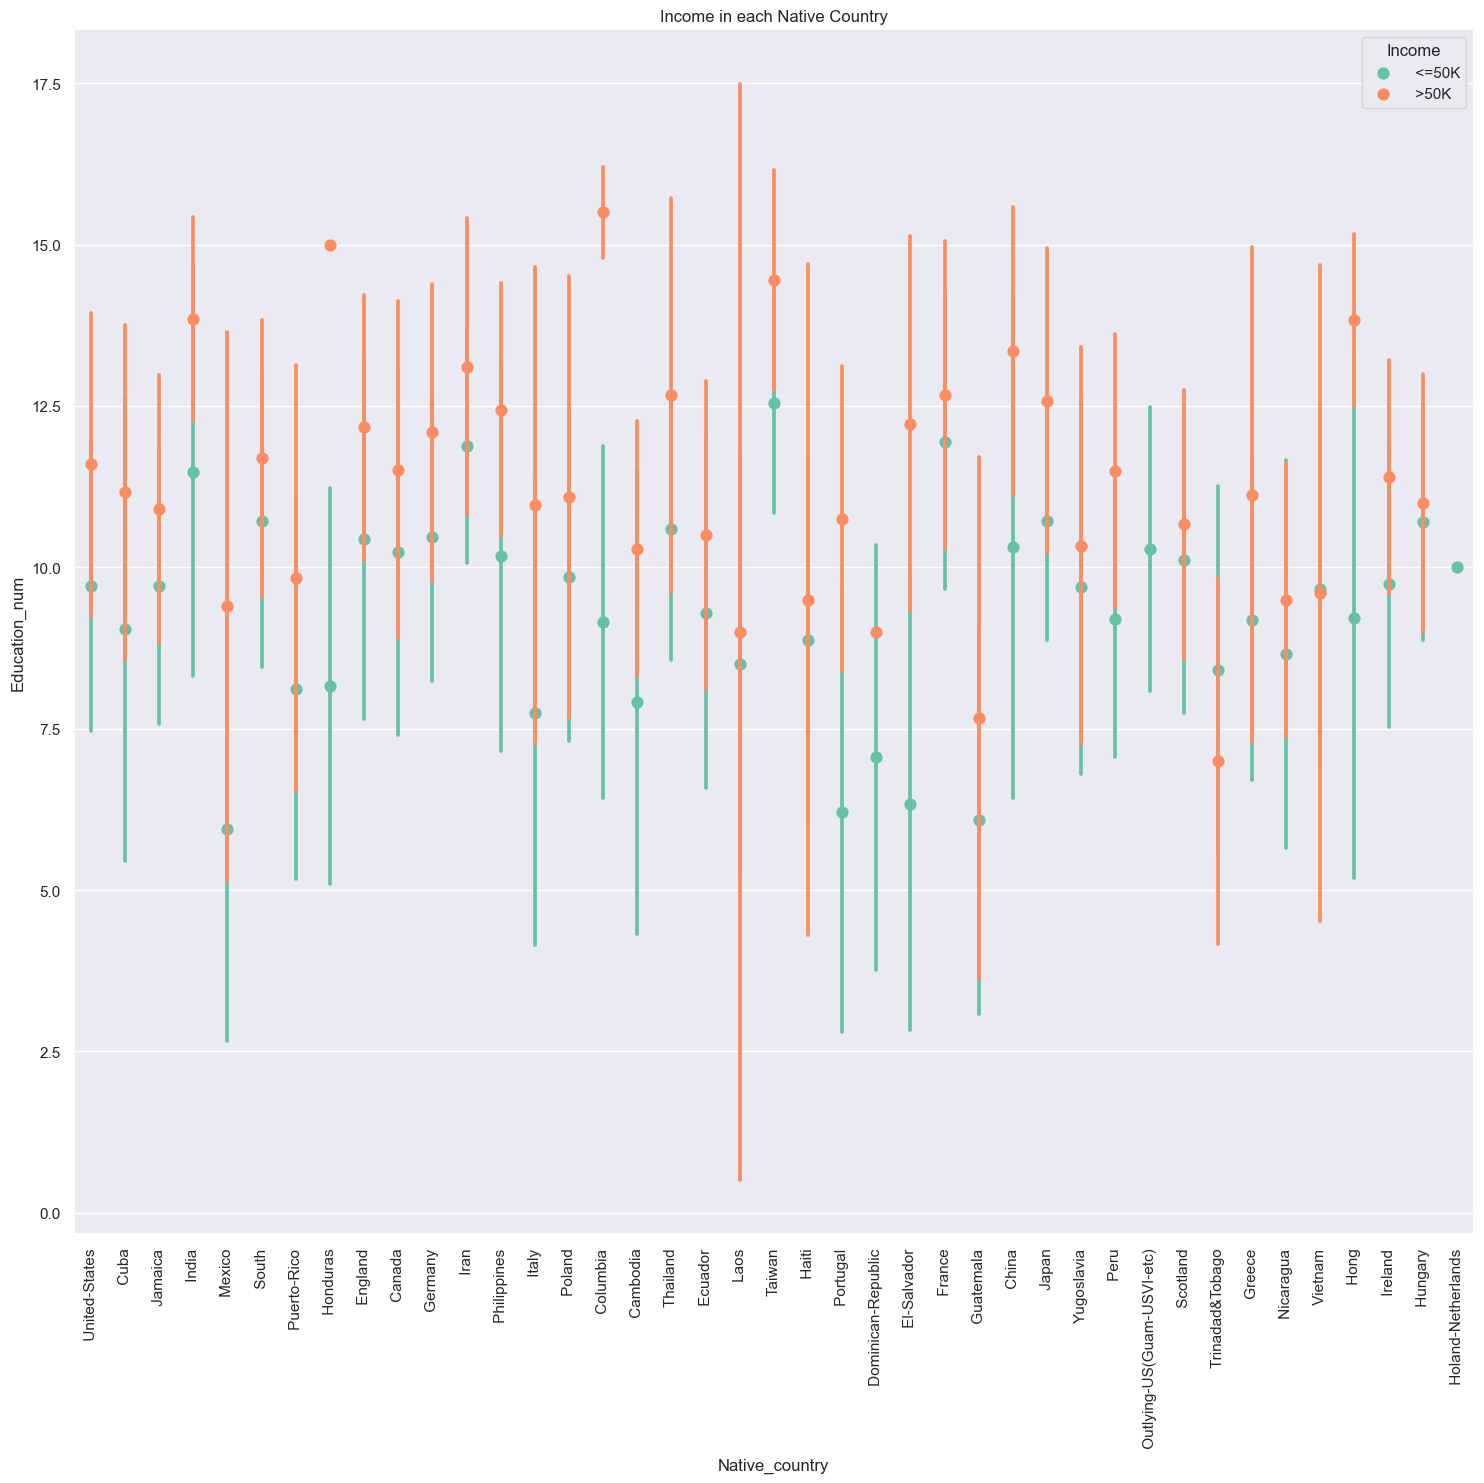

In [454]:
# Visualizing how the income changes for Native country of the people
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=df, hue='Income',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

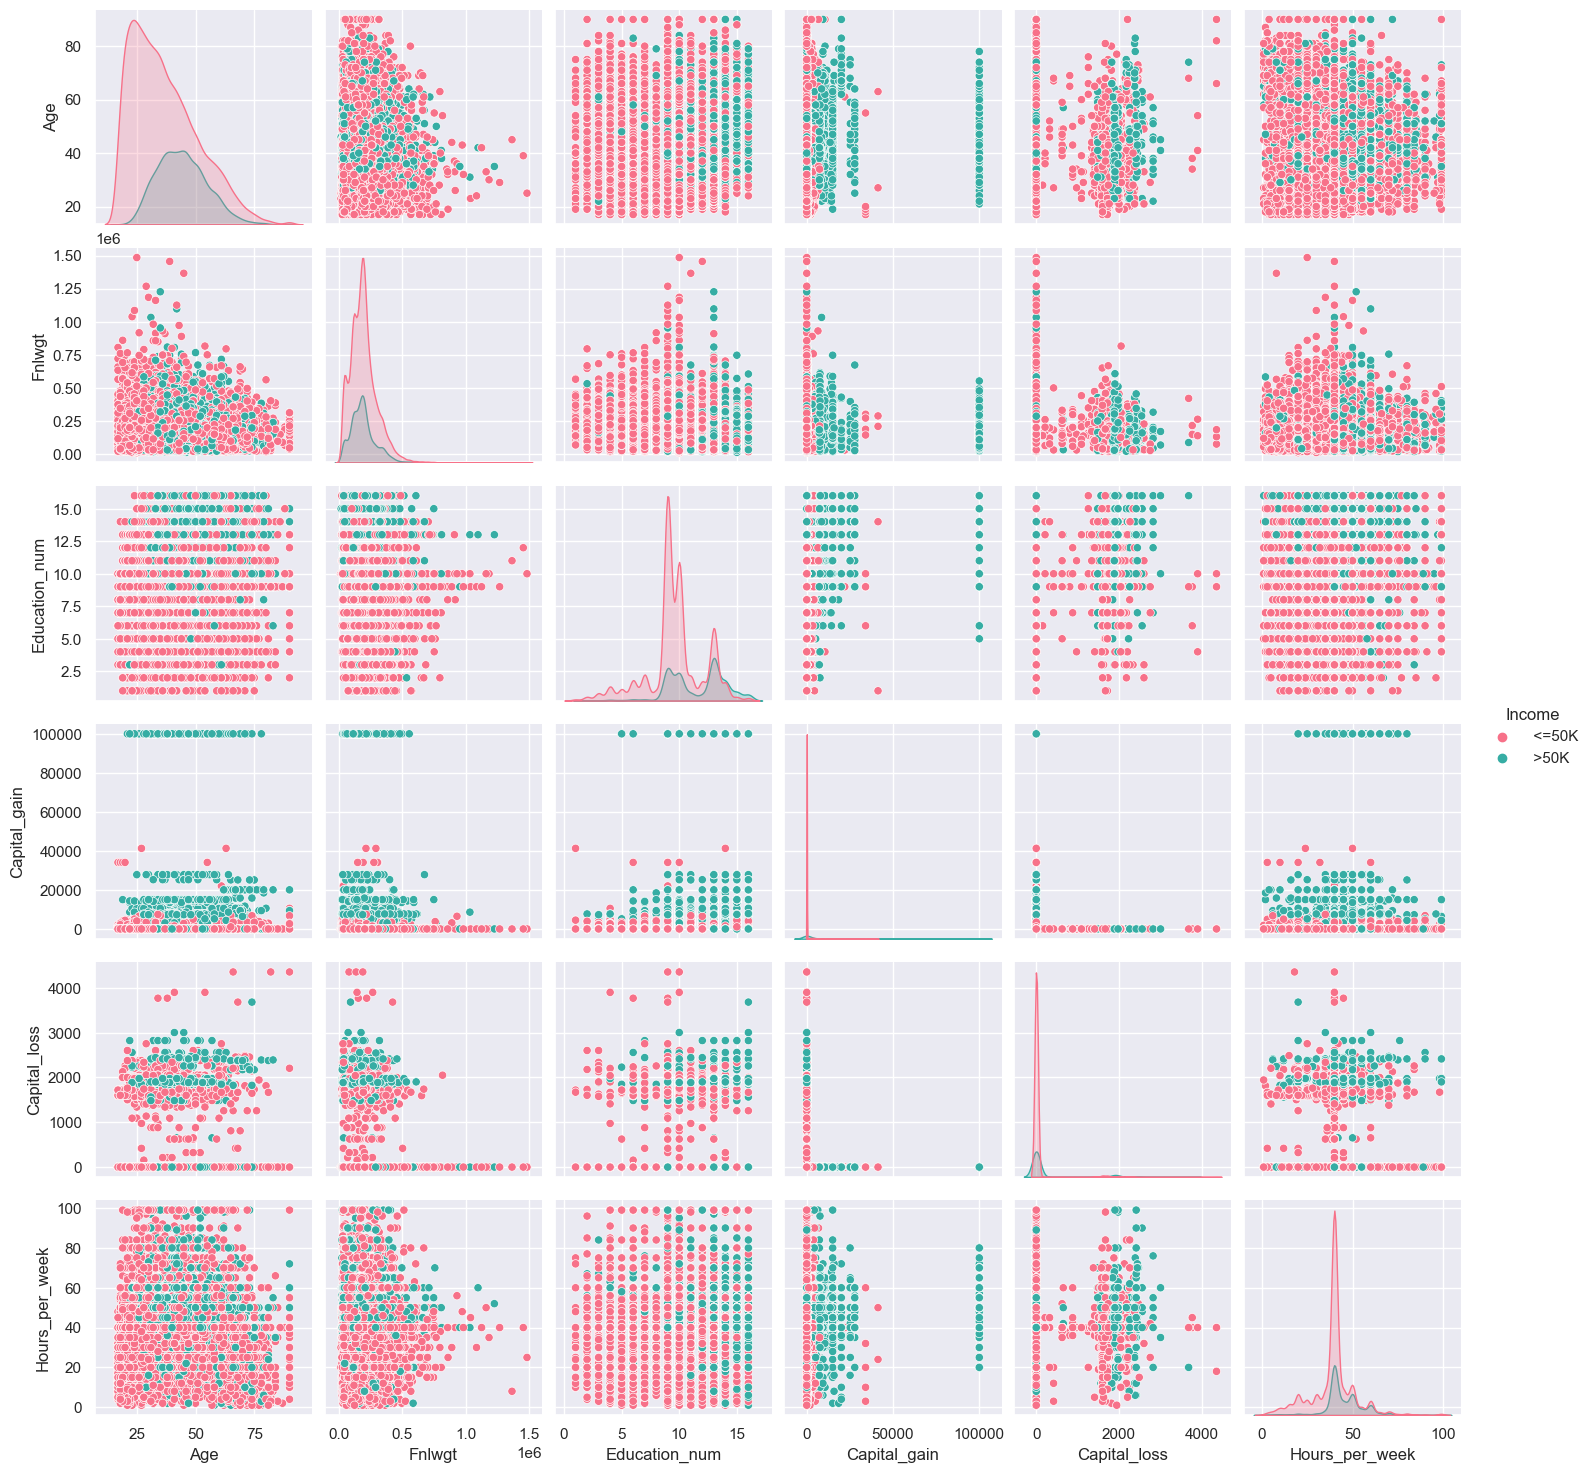

In [455]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Income",palette="husl")

In [456]:
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  \
0             0             0              13   United-States   <=50K   
1             0             0              40   United-States   <=50K   
2             0             0              40   United-States   <=50K   
3             0             0              40            Cuba   <=50K   
4             0             0              40   United-States   <=50K   

  age_group  
0     41-50  
1     31-40  
2     51-60  
3     19-30  
4     31-40

# Encoding categorical data

In [457]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50          5   83311          9             13               2   
1   38          3  215646         11              9               0   
2   53          3  234721          1              7               2   
3   28          3  338409          9             13               2   
4   37          3  284582         12             14               2   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0           3             0     4    1             0             0   
1           5             1     4    1             0             0   
2           5             0     2    1             0             0   
3           9             5     2    0             0             0   
4           3             5     4    0             0             0   

   Hours_per_week  Native_country  Income age_group  
0              13              38       0     41-50  
1              40              38       0     31-40  
2              40              38       0     51-60  
3              40               4       0     19-30  
4              40              38       0     31-40

# Feature selection and Engineering

# 1. Outliers Detection and Removal

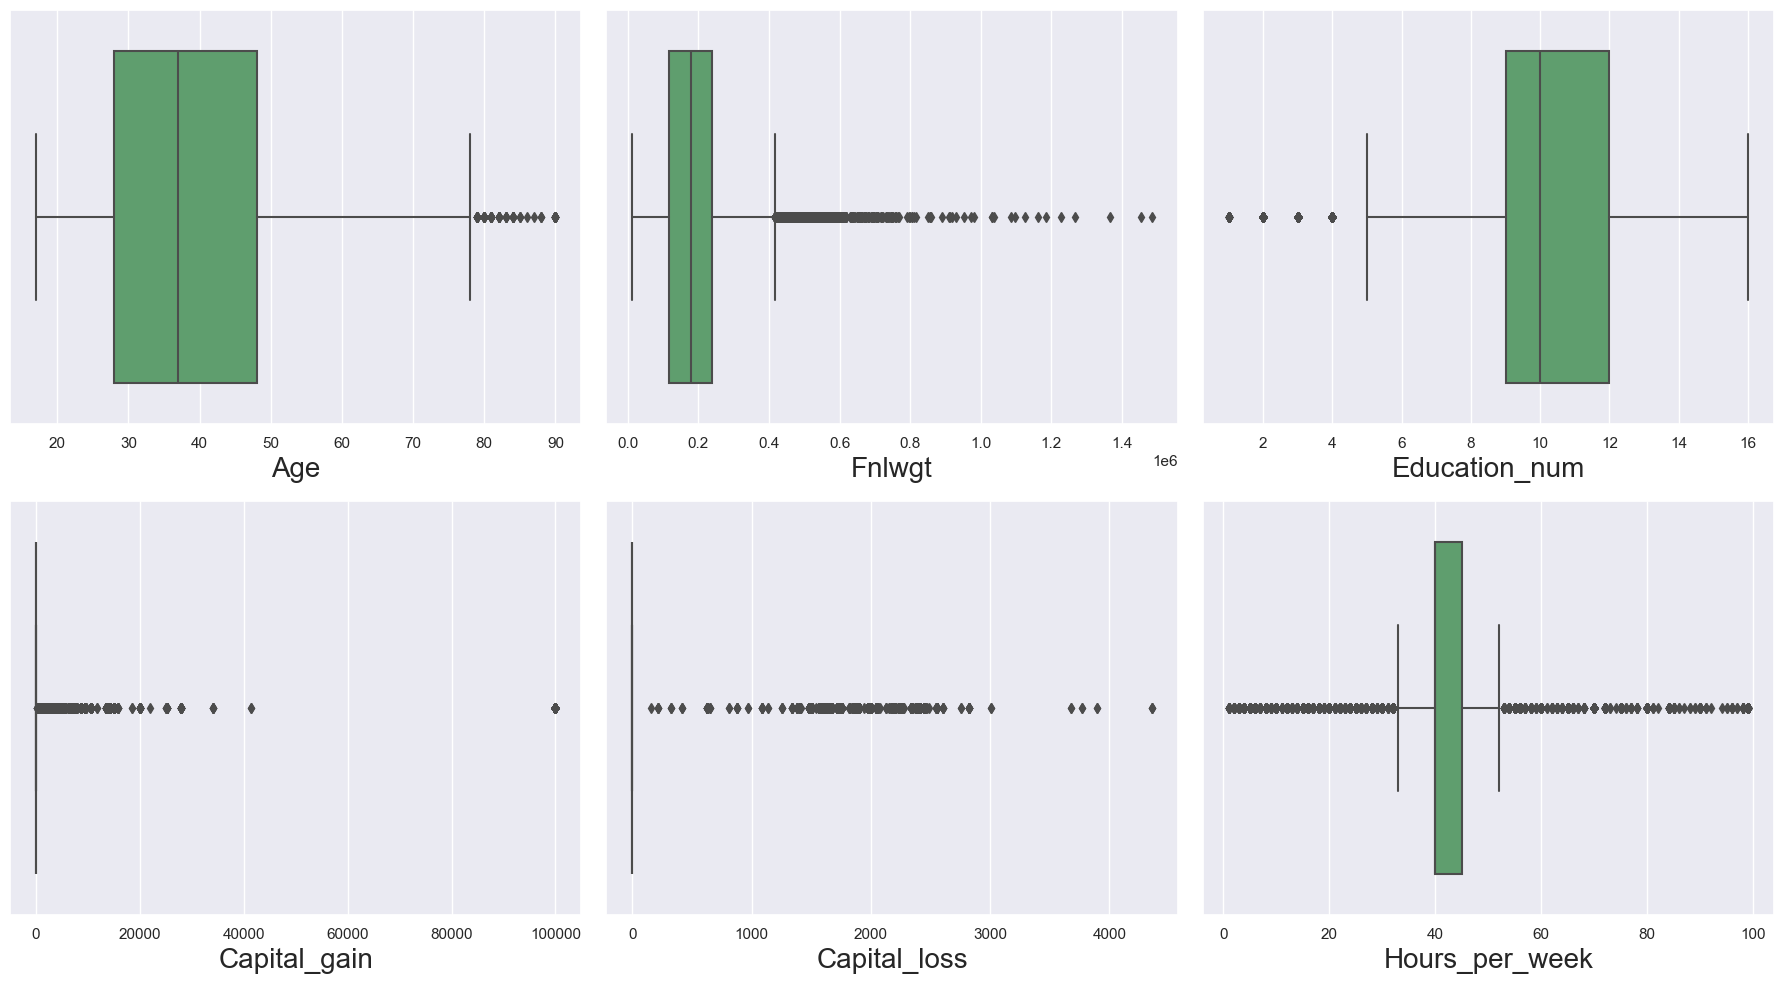

In [458]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(x=df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**From Boxplot we can see outliers exist dataset**

In [459]:
# Droping unnecessary columns.
df.drop(["Fnlwgt","Education"], axis=1, inplace=True)

**Outliers removal using Zscore method**

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32536 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  int32 
 2   Education_num   32536 non-null  int64 
 3   Marital_status  32536 non-null  int32 
 4   Occupation      32536 non-null  int32 
 5   Relationship    32536 non-null  int32 
 6   Race            32536 non-null  int32 
 7   Sex             32536 non-null  int32 
 8   Capital_gain    32536 non-null  int64 
 9   Capital_loss    32536 non-null  int64 
 10  Hours_per_week  32536 non-null  int64 
 11  Native_country  32536 non-null  int32 
 12  Income          32536 non-null  int32 
 13  age_group       32536 non-null  object
dtypes: int32(8), int64(5), object(1)
memory usage: 2.7+ MB


In [487]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['age_group'])
label

array([2, 1, 3, ..., 3, 0, 3])

In [488]:
df.drop("age_group", axis=1, inplace=True)

In [489]:
df["age_group"] = label

In [490]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (32536, 14)
Shape of the dataframe after removing outliers:  (28061, 14)
Percentage of data loss post outlier removal:  13.753995574133269


In [491]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((32536-28061)/32536)*100,'%')

Percentage Data Loss : 13.753995574133269 %


- We are losing 13.75 % of data. Its big but we can afford it. Considering we have a lot of rows in our datatset for ML model building. We have option to go for quantile method but by looking at boxplot we can say lower capping will result in useful data loss and eventually data loss will be more than zscore method.

# 2. Skewness of features

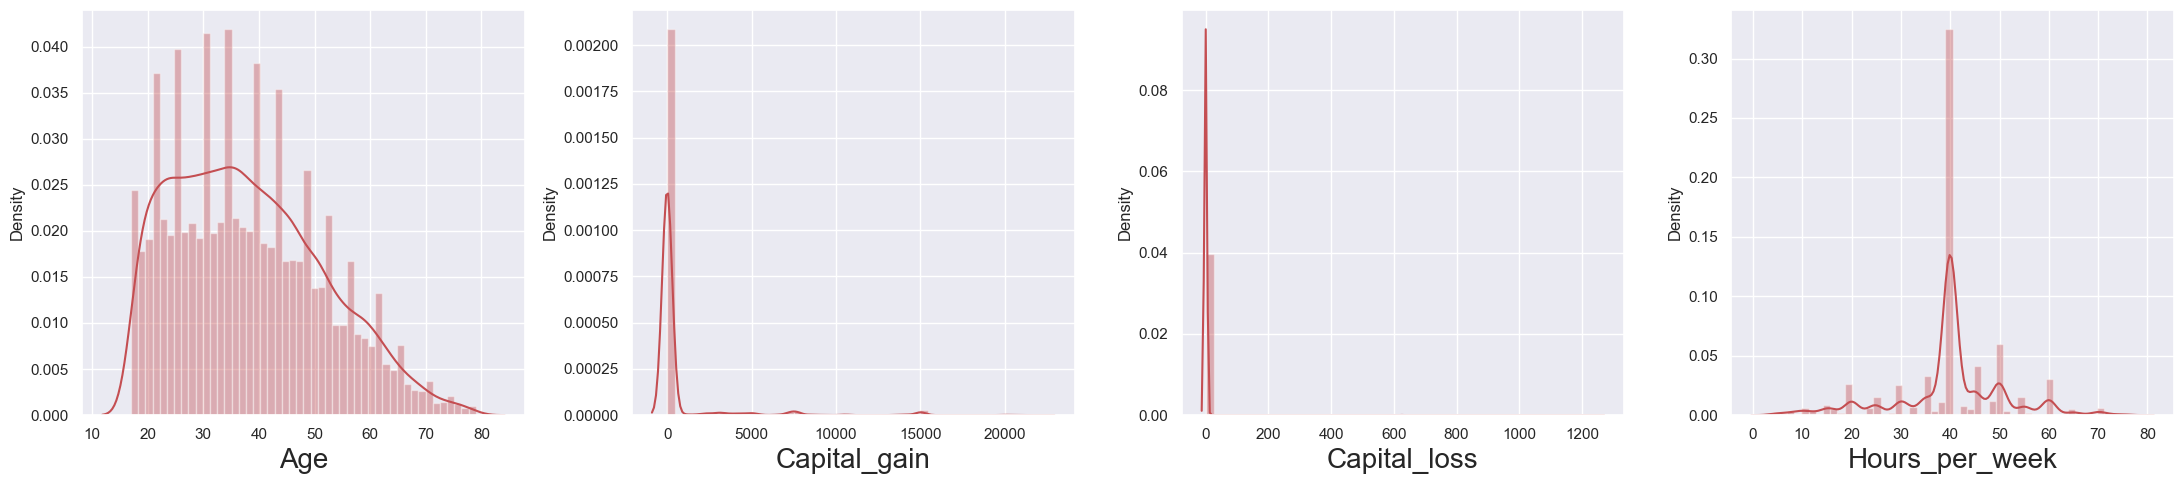

In [492]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in df[['Age','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [493]:
df.skew()

Age                0.487918
Workclass          0.080746
Education_num     -0.147601
Marital_status    -0.046623
Occupation         0.015247
Relationship       0.752334
Race              -2.549199
Sex               -0.689977
Capital_gain       4.924729
Capital_loss      29.669292
Hours_per_week    -0.359365
Native_country    -5.348195
Income             1.322011
age_group          0.782980
dtype: float64

- Relationship,Sex,Native_country,Income are skewed but as they are categorical concept of skewness doesnot mean anything to it.
- Capital_gain and Capital_loss are numeric variable with lot of zero and high number. So skewness exist in them. There is no point in transforming it because at end data will be skewed.

**We will have option of scaling data to handle skewness in Capital gain and Capital loss.**

# 3. Corrleation

In [494]:
df.corr()

Age  Workclass  Education_num  Marital_status  \
Age             1.000000   0.029674       0.045622       -0.286328   
Workclass       0.029674   1.000000      -0.002200       -0.015623   
Education_num   0.045622  -0.002200       1.000000       -0.058587   
Marital_status -0.286328  -0.015623      -0.058587        1.000000   
Occupation     -0.001610   0.008779       0.073142        0.036477   
Relationship   -0.270591  -0.057823      -0.092447        0.183248   
Race            0.021292   0.067532       0.080766       -0.084558   
Sex             0.089469   0.069617       0.003688       -0.125361   
Capital_gain    0.131998   0.011083       0.157858       -0.069601   
Capital_loss    0.023459  -0.010613       0.007348       -0.016396   
Hours_per_week  0.090783   0.028104       0.156303       -0.196053   
Native_country  0.037494   0.001938       0.149688       -0.032575   
Income          0.241844  -0.007699       0.320271       -0.194146   
age_group       0.707759   0.021257      -0.104642       -0.125166   

                Occupation  Relationship      Race       Sex  Capital_gain  \
Age              -0.001610     -0.270591  0.021292  0.089469      0.131998   
Workclass         0.008779     -0.057823  0.067532  0.069617      0.011083   
Education_num     0.073142     -0.092447  0.080766  0.003688      0.157858   
Marital_status    0.036477      0.183248 -0.084558 -0.125361     -0.069601   
Occupation        1.000000     -0.038735  0.000613  0.051055      0.009446   
Relationship     -0.038735      1.000000 -0.146432 -0.577195     -0.089095   
Race              0.000613     -0.146432  1.000000  0.122731      0.031333   
Sex               0.051055     -0.577195  0.122731  1.000000      0.069539   
Capital_gain      0.009446     -0.089095  0.031333  0.069539      1.000000   
Capital_loss     -0.004779      0.030105  0.000186 -0.027323     -0.009077   
Hours_per_week   -0.022194     -0.261919  0.055486  0.236168      0.098705   
Native_country    0.018069     -0.011274  0.018660 -0.011189      0.019185   
Income            0.030664     -0.248263  0.094756  0.211792      0.343487   
age_group         0.040595     -0.124708  0.027676  0.037398      0.087275   

                Capital_loss  Hours_per_week  Native_country    Income  \
Age                 0.023459        0.090783        0.037494  0.241844   
Workclass          -0.010613        0.028104        0.001938 -0.007699   
Education_num       0.007348        0.156303        0.149688  0.320271   
Marital_status     -0.016396       -0.196053       -0.032575 -0.194146   
Occupation         -0.004779       -0.022194        0.018069  0.030664   
Relationship        0.030105       -0.261919       -0.011274 -0.248263   
Race                0.000186        0.055486        0.018660  0.094756   
Sex                -0.027323        0.236168       -0.011189  0.211792   
Capital_gain       -0.009077        0.098705        0.019185  0.343487   
Capital_loss        1.000000       -0.003440        0.002925 -0.016465   
Hours_per_week     -0.003440        1.000000        0.004380  0.233472   
Native_country      0.002925        0.004380        1.000000  0.047240   
Income             -0.016465        0.233472        0.047240  1.000000   
age_group           0.016632       -0.126058        0.046458  0.139798   

                age_group  
Age              0.707759  
Workclass        0.021257  
Education_num   -0.104642  
Marital_status  -0.125166  
Occupation       0.040595  
Relationship    -0.124708  
Race             0.027676  
Sex              0.037398  
Capital_gain     0.087275  
Capital_loss     0.016632  
Hours_per_week  -0.126058  
Native_country   0.046458  
Income           0.139798  
age_group        1.000000

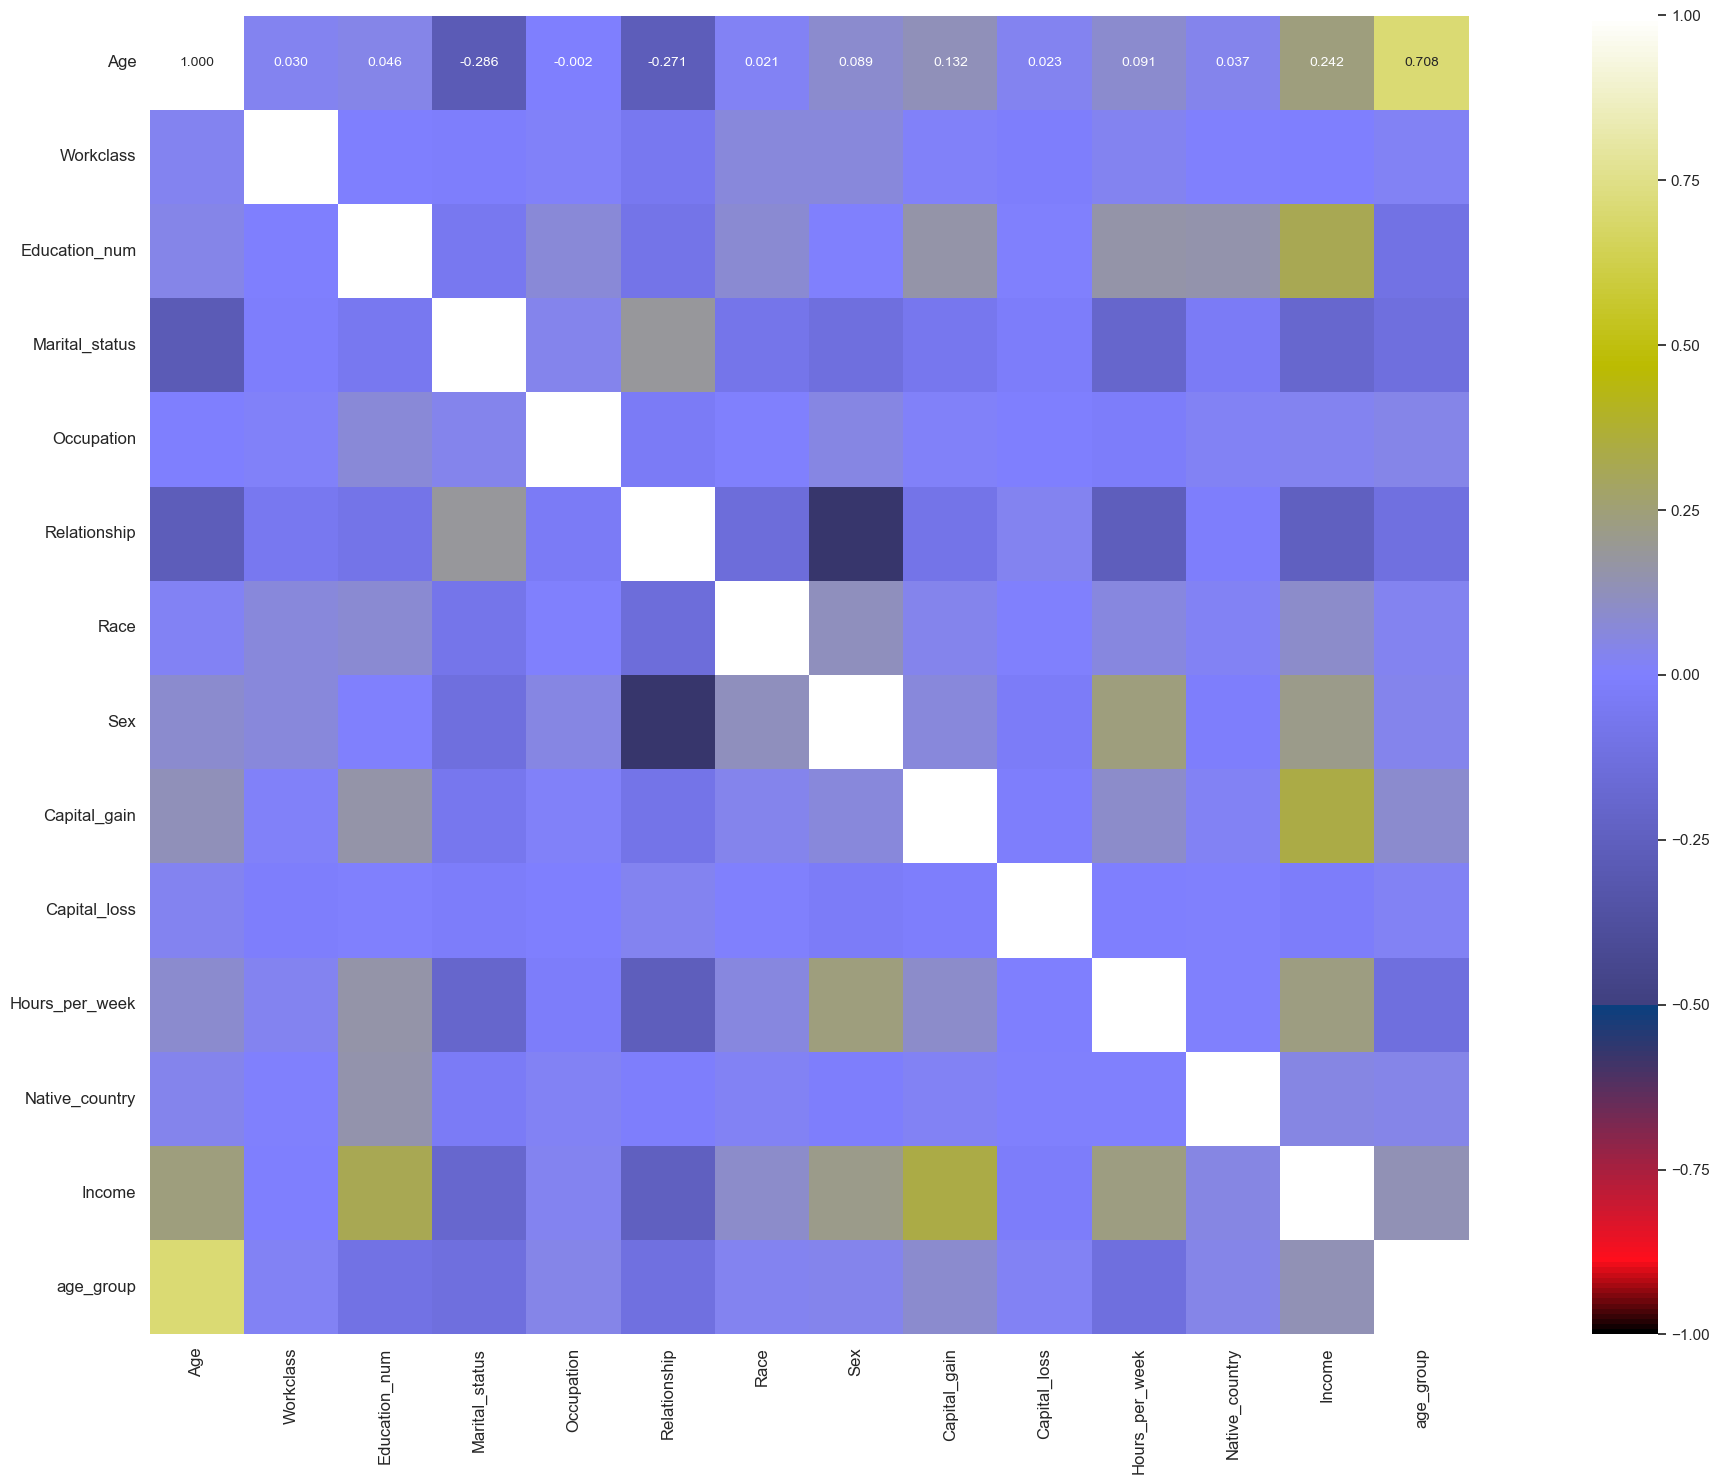

In [495]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

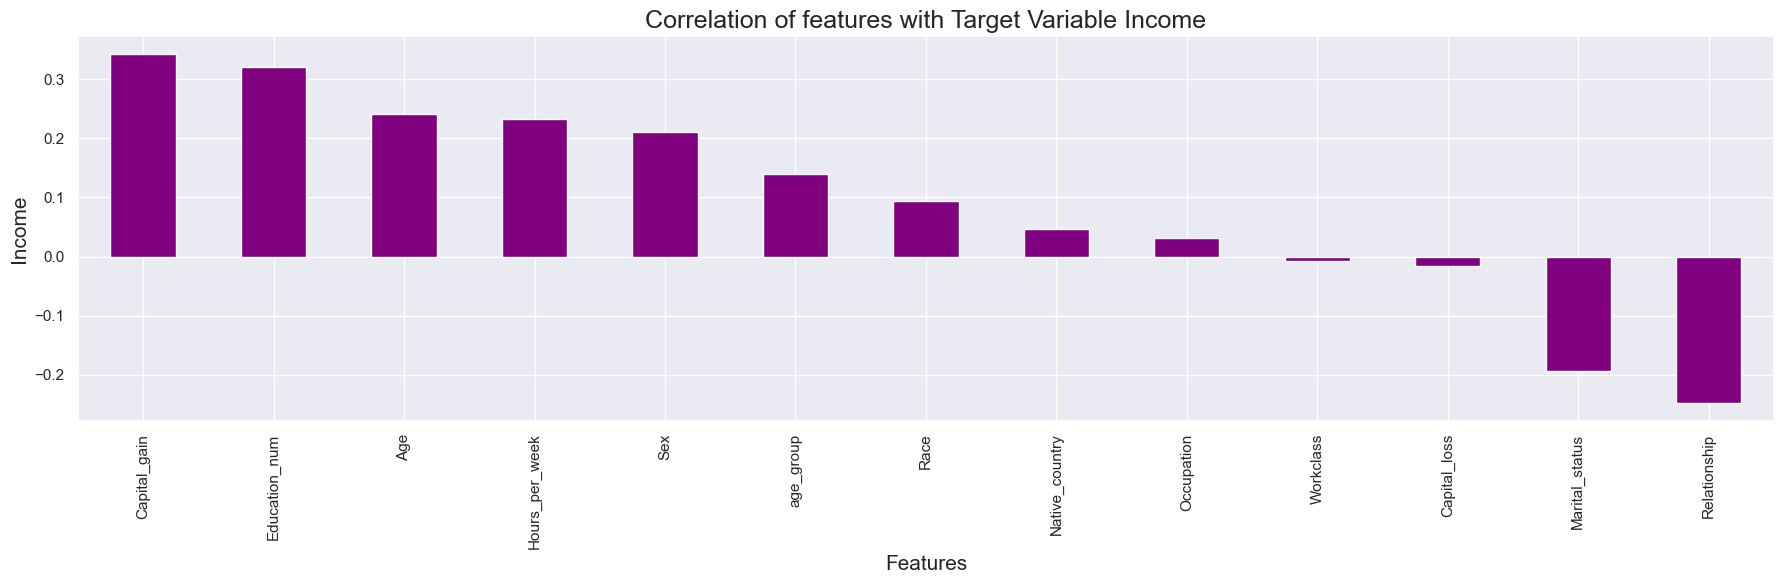

In [496]:
plt.figure(figsize = (18,6))
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Income',fontsize = 18)
plt.show()

**Observation:**

- Capital loss and workclass,occupation, native country, race are correlated with target variable with less than 10% correlation. After checking Mulitcollinearity we will decide to drop these poorly correlated features or go for PCA.

As high or low Correlation doesnot mean its causation !!!

- Between input features maximum correlation of -0.557 exist between sex and relationship.

- Capital gain is highly correlated with target variable.

# 4. Checking Multicollinearity between features using variance_inflation_factor

In [497]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

VIF        Features
0   21.289242             Age
1    8.807677       Workclass
2   22.087324   Education_num
3    4.374158  Marital_status
4    3.369905      Occupation
5    2.940874    Relationship
6   36.314813            Race
7    4.569067             Sex
8    1.210195    Capital_gain
9    1.004299    Capital_loss
10  16.247398  Hours_per_week
11  79.089521  Native_country
12   1.785792          Income
13   4.830932       age_group

**Strategy to Address Multicollinearity :**
- Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
- Another way to address Multicollinerity is to Scaled Data and then apply PCA.

**We will go by Second way for further investigation. As For some Independent feature VIF is exceed permissible limit of 10.**

# 5. Balanceing Imbalanced target feature

In [498]:
df.Income.value_counts()

Income
0    21767
1     6294
Name: count, dtype: int64

**As Target variable data is Imbalanced in nature we will need to balance target variable.**

# Balancing using SMOTE

In [499]:
from imblearn.over_sampling import SMOTE

In [500]:
# Splitting data in target and dependent feature
X = df.drop(['Income'], axis =1)
Y = df['Income']

In [501]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [503]:
Y.value_counts()

Income
0    21767
1    21767
Name: count, dtype: int64

**We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.**

# Standard Scaling

In [504]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

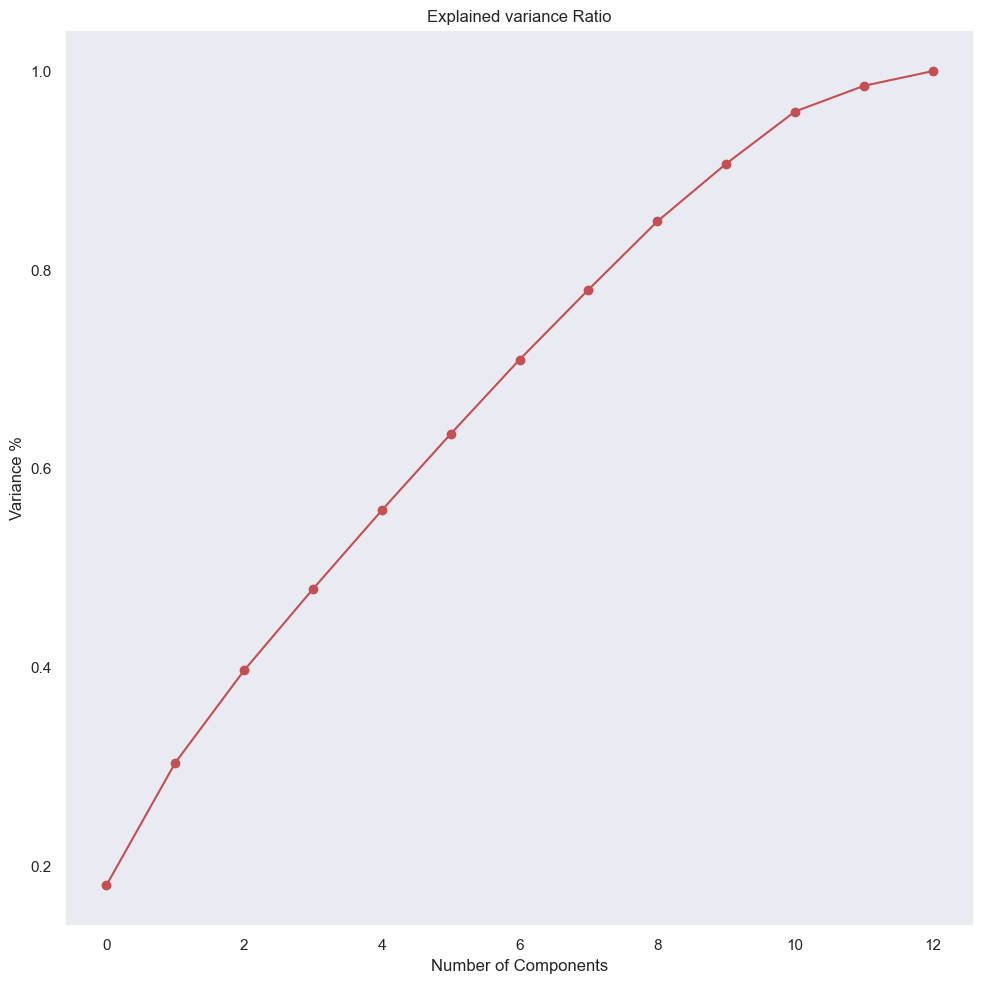

In [505]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

- AS per the graph, we can see that 9 principal components attribute for 90% of variation in the data. We shall pick the first 9 components for our prediction.

In [506]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [507]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

# Machine Learning Model Building

In [508]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [509]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (30473, 9)
Training target vector size: (30473,)
Test feature matrix size: (13061, 9)
Test target vector size: (13061,)


In [510]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7738304877115075 on Random_state 241


In [512]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=241, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation
Accuracy Score of Logistics Regression : 0.7738304877115075
Confusion matrix of Logistics Regression : 
 [[5026 1522]
 [1432 5081]]
classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.78      0.77      0.77      6548
           1       0.77      0.78      0.77      6513

    accuracy                           0.77     13061
   macro avg       0.77      0.77      0.77     13061
weighted avg       0.77      0.77      0.77     13061



In [513]:
# Finding optimal value of n_neighbvors for KNN
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.3975270004683587
RMSE value for k=  2 is: 0.41835975337044634
RMSE value for k=  3 is: 0.3899432503044574
RMSE value for k=  4 is: 0.39685232693003875
RMSE value for k=  5 is: 0.38856639720237846
RMSE value for k=  6 is: 0.392974829667452
RMSE value for k=  7 is: 0.392974829667452
RMSE value for k=  8 is: 0.3973343534977681
RMSE value for k=  9 is: 0.39326696810180317
RMSE value for k=  10 is: 0.3971416130772601
RMSE value for k=  11 is: 0.3942391994200863
RMSE value for k=  12 is: 0.39569306741273513


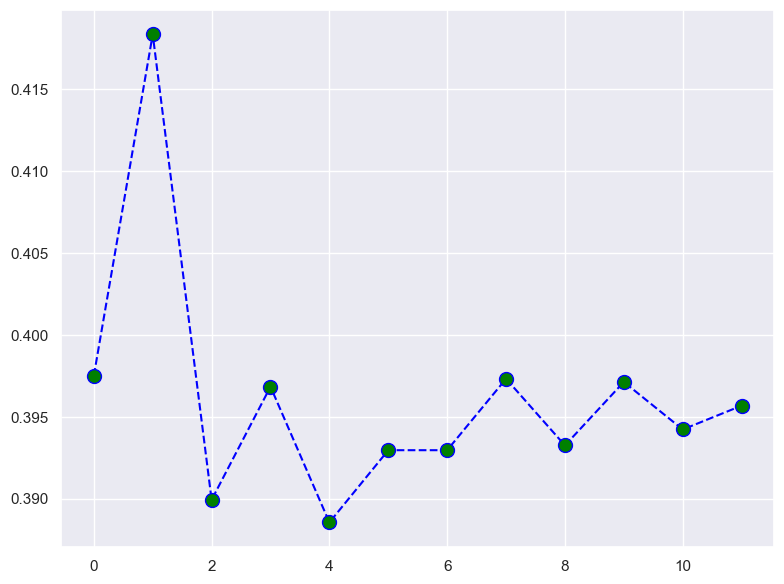

In [514]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(12), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

- At k=5, we get the minimum RMSE value which approximately 0.38856639720237846, and shoots up on further increasing the k value. We can safely say that k=3 will give us the best result in this case.

# Applying other classification algorithm

In [517]:
model=[ LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 5),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('=================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is
Accuracy Score :
 0.7738304877115075
Confusion matrix : 
 [[5026 1522]
 [1432 5081]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.77      0.77      6548
           1       0.77      0.78      0.77      6513

    accuracy                           0.77     13061
   macro avg       0.77      0.77      0.77     13061
weighted avg       0.77      0.77      0.77     13061

Classification ML Algorithm Evaluation Matrix SVC() is
Accuracy Score :
 0.831329913482888
Confusion matrix : 
 [[4998 1550]
 [ 653 5860]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.76      0.82      6548
           1       0.79      0.90      0.84      6513

    accuracy                           0.83     13061
   macro avg       0.84      0.83      0.83     13061
weighted avg       0.84      0.83      0.83     13061



# Cross Validation:

In [519]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 5),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('=============================================================')



Cross Validation Score LogisticRegression() :

Score : [0.759389   0.76869186 0.76294935 0.76800276 0.77038824]
Mean Score : 0.7658842399962787
Std deviation : 0.004085549497430226


Cross Validation Score SVC() :

Score : [0.81244975 0.82106351 0.82623177 0.82841392 0.83149552]
Mean Score : 0.8239308945795413
Std deviation : 0.0066731340026840585


Cross Validation Score DecisionTreeClassifier() :

Score : [0.79602619 0.81853681 0.83151487 0.84139198 0.83769814]
Mean Score : 0.825033598211536
Std deviation : 0.01645376873613575


Cross Validation Score KNeighborsClassifier() :

Score : [0.81830711 0.83266337 0.84759389 0.86206501 0.85492764]
Mean Score : 0.8431114029547746
Std deviation : 0.015769396838133994


Cross Validation Score RandomForestClassifier() :

Score : [0.83071092 0.8526473  0.86975996 0.87768462 0.87376522]
Mean Score : 0.8609136043463739
Std deviation : 0.017350636675976746


Cross Validation Score ExtraTreesClassifier() :

Score : [0.82692087 0.85069484 0.8712530

# Hyper Parameter Tuning : GridSearchCV

In [523]:
from sklearn.model_selection import GridSearchCV

In [524]:
parameter= {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [100, 150, 200]
             }

In [525]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=2)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100; total time=   1.5s
[CV] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100; total time=   1.4s
[CV] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100; total time=   1.5s
[CV] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100; total time=   1.5s
[CV] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=150; total time=   2.3s
[CV] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=150; total time=   2.2s
[CV] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=150; total time=   2.4s
[CV] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=150; total time=   2.3s
[CV] END criterion=gini, max_depth=20, min_samples_split=3, n_est

[CV] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=150; total time=   3.6s
[CV] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=200; total time=   4.1s
[CV] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=200; total time=   4.1s
[CV] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=200; total time=   4.7s
[CV] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=200; total time=   3.5s
[CV] END criterion=gini, max_depth=30, min_samples_split=8, n_estimators=200; total time=   3.3s
[CV] END criterion=gini, max_depth=40, min_samples_split=3, n_estimators=100; total time=   1.9s
[CV] END criterion=gini, max_depth=40, min_samples_split=3, n_estimators=100; total time=   1.9s
[CV] END criterion=gini, max_depth=40, min_samples_split=3, n_estimators=100; total time=   5.5s
[CV] END criterion=gini, max_depth=40, min_samples_split=3, n_estimators=100; total time=   3.7s
[CV] END criterion=gini, max_d

[CV] END criterion=entropy, max_depth=20, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV] END criterion=entropy, max_depth=20, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV] END criterion=entropy, max_depth=20, min_samples_split=8, n_estimators=150; total time=   2.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=8, n_estimators=150; total time=   2.1s
[CV] END criterion=entropy, max_depth=20, min_samples_split=8, n_estimators=150; total time=   2.2s
[CV] END criterion=entropy, max_depth=20, min_samples_split=8, n_estimators=150; total time=   2.6s
[CV] END criterion=entropy, max_depth=20, min_samples_split=8, n_estimators=150; total time=   2.1s
[CV] END criterion=entropy, max_depth=20, min_samples_split=8, n_estimators=200; total time=   2.9s
[CV] END criterion=entropy, max_depth=20, min_samples_split=8, n_estimators=200; total time=   2.9s
[CV] END criterion=entropy, max_depth=20, min_samples_split=8, n_estimators=200; total time=   3.0s


[CV] END criterion=entropy, max_depth=40, min_samples_split=5, n_estimators=200; total time=   3.9s
[CV] END criterion=entropy, max_depth=40, min_samples_split=5, n_estimators=200; total time=   4.3s
[CV] END criterion=entropy, max_depth=40, min_samples_split=5, n_estimators=200; total time=   4.8s
[CV] END criterion=entropy, max_depth=40, min_samples_split=5, n_estimators=200; total time=   4.3s
[CV] END criterion=entropy, max_depth=40, min_samples_split=5, n_estimators=200; total time=   4.3s
[CV] END criterion=entropy, max_depth=40, min_samples_split=8, n_estimators=100; total time=   2.0s
[CV] END criterion=entropy, max_depth=40, min_samples_split=8, n_estimators=100; total time=   1.9s
[CV] END criterion=entropy, max_depth=40, min_samples_split=8, n_estimators=100; total time=   1.7s
[CV] END criterion=entropy, max_depth=40, min_samples_split=8, n_estimators=100; total time=   2.0s
[CV] END criterion=entropy, max_depth=40, min_samples_split=8, n_estimators=100; total time=   1.9s


GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=2)

In [526]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_split': 5,
 'n_estimators': 200}

# Final Model

In [527]:
Final_mod = ExtraTreesClassifier(criterion='entropy',n_estimators= 200, max_depth=30 ,min_samples_split= 5)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.866319577367736


# Saving model

In [530]:
import joblib
joblib.dump(Final_mod,'Census_Income_Final.pkl')

['Census_Income_Final.pkl']